# Superconducting charge qubit

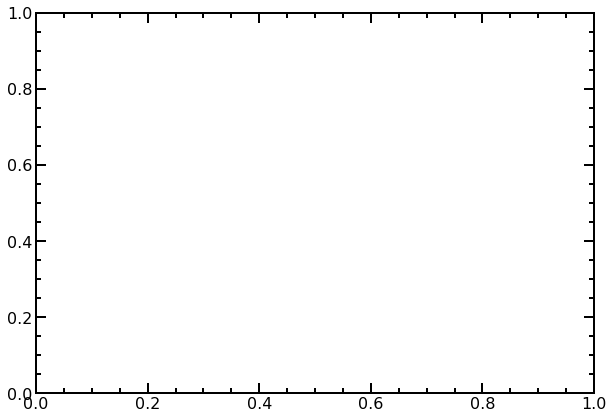

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

## Charge basis
Consider an isolated electrode with well-defined number of charge carriers. The state of such object can be described by quantum state $|n'\rangle$, with $n'$ specifying the number of excess Cooper pairs on the island, and we can also define the charge operator in this basis as $n=\sum_{n'} n'|n'\rangle \langle n'|$. It's obvious that $n|n'\rangle = n'|n'\rangle$. Define the charging energy associated with one electron as $E_C=e^2/2C$, then the island has an energy $H_C = 4E_Cn^2 = 4E_C\left( \sum_{n'} n' |n'\rangle \langle n'| \right)^2$.

Cooper pairs can tunnel in and out of the island if it is made of a Josephson junction. This process can be described by a phenomenological Hamiltonian $H_J = -\frac{E_J}{2}\sum_{n'} \left( |n'\rangle \langle n'+1| + |n'+1\rangle \langle n'| \right)$, where the tunneling amplitude is specified by the Josephson energy $E_J=I_c \phi_o$ ($\phi_o = \hbar/2e$ is the reduced flux quantum). Combining the two terms and adding a gate charge number $n_g = C_gV/e$ to the number of excess Cooper pairs on the electrodes, we get the Cooper Pair Box (CPB) Hamiltonian in the charge basis
$$H_\mathrm{CPB} = 4E_C\left( \sum_{n'} n' |n'\rangle \langle n'| -n_g \right)^2 -\frac{E_J}{2}\sum_{n'} \left( |n'\rangle \langle n'+1| + |n'+1\rangle \langle n'| \right).$$
Below, we compute and plot the spectrum and matrix elements using this basis. We note here that the charge number $n'$ must be discrete, $n' \in \mathbb{Z}$

In [2]:
#From qutip.org
def hamiltonian_charge(N, Ec, Ej, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) - 0.5 * Ej * (np.diag(np.ones(2*N), 1) + 
                                                               np.diag(np.ones(2*N), -1))
    return Qobj(m)

In [51]:
#parameters
N = 20
Ec = 0.15
Ej = 15
lvl_num = 5
ng_array = np.linspace(-2,2,401)
energies = np.zeros((len(ng_array), 2*N+1))
print (Ej/Ec)

100.0


### Spectrum

In [52]:
#Spectrum
for idx_ng, ng in enumerate (ng_array):
    energies[idx_ng,:] = hamiltonian_charge(N, Ec, Ej, ng).eigenenergies()  

(-2.0, 2.0)

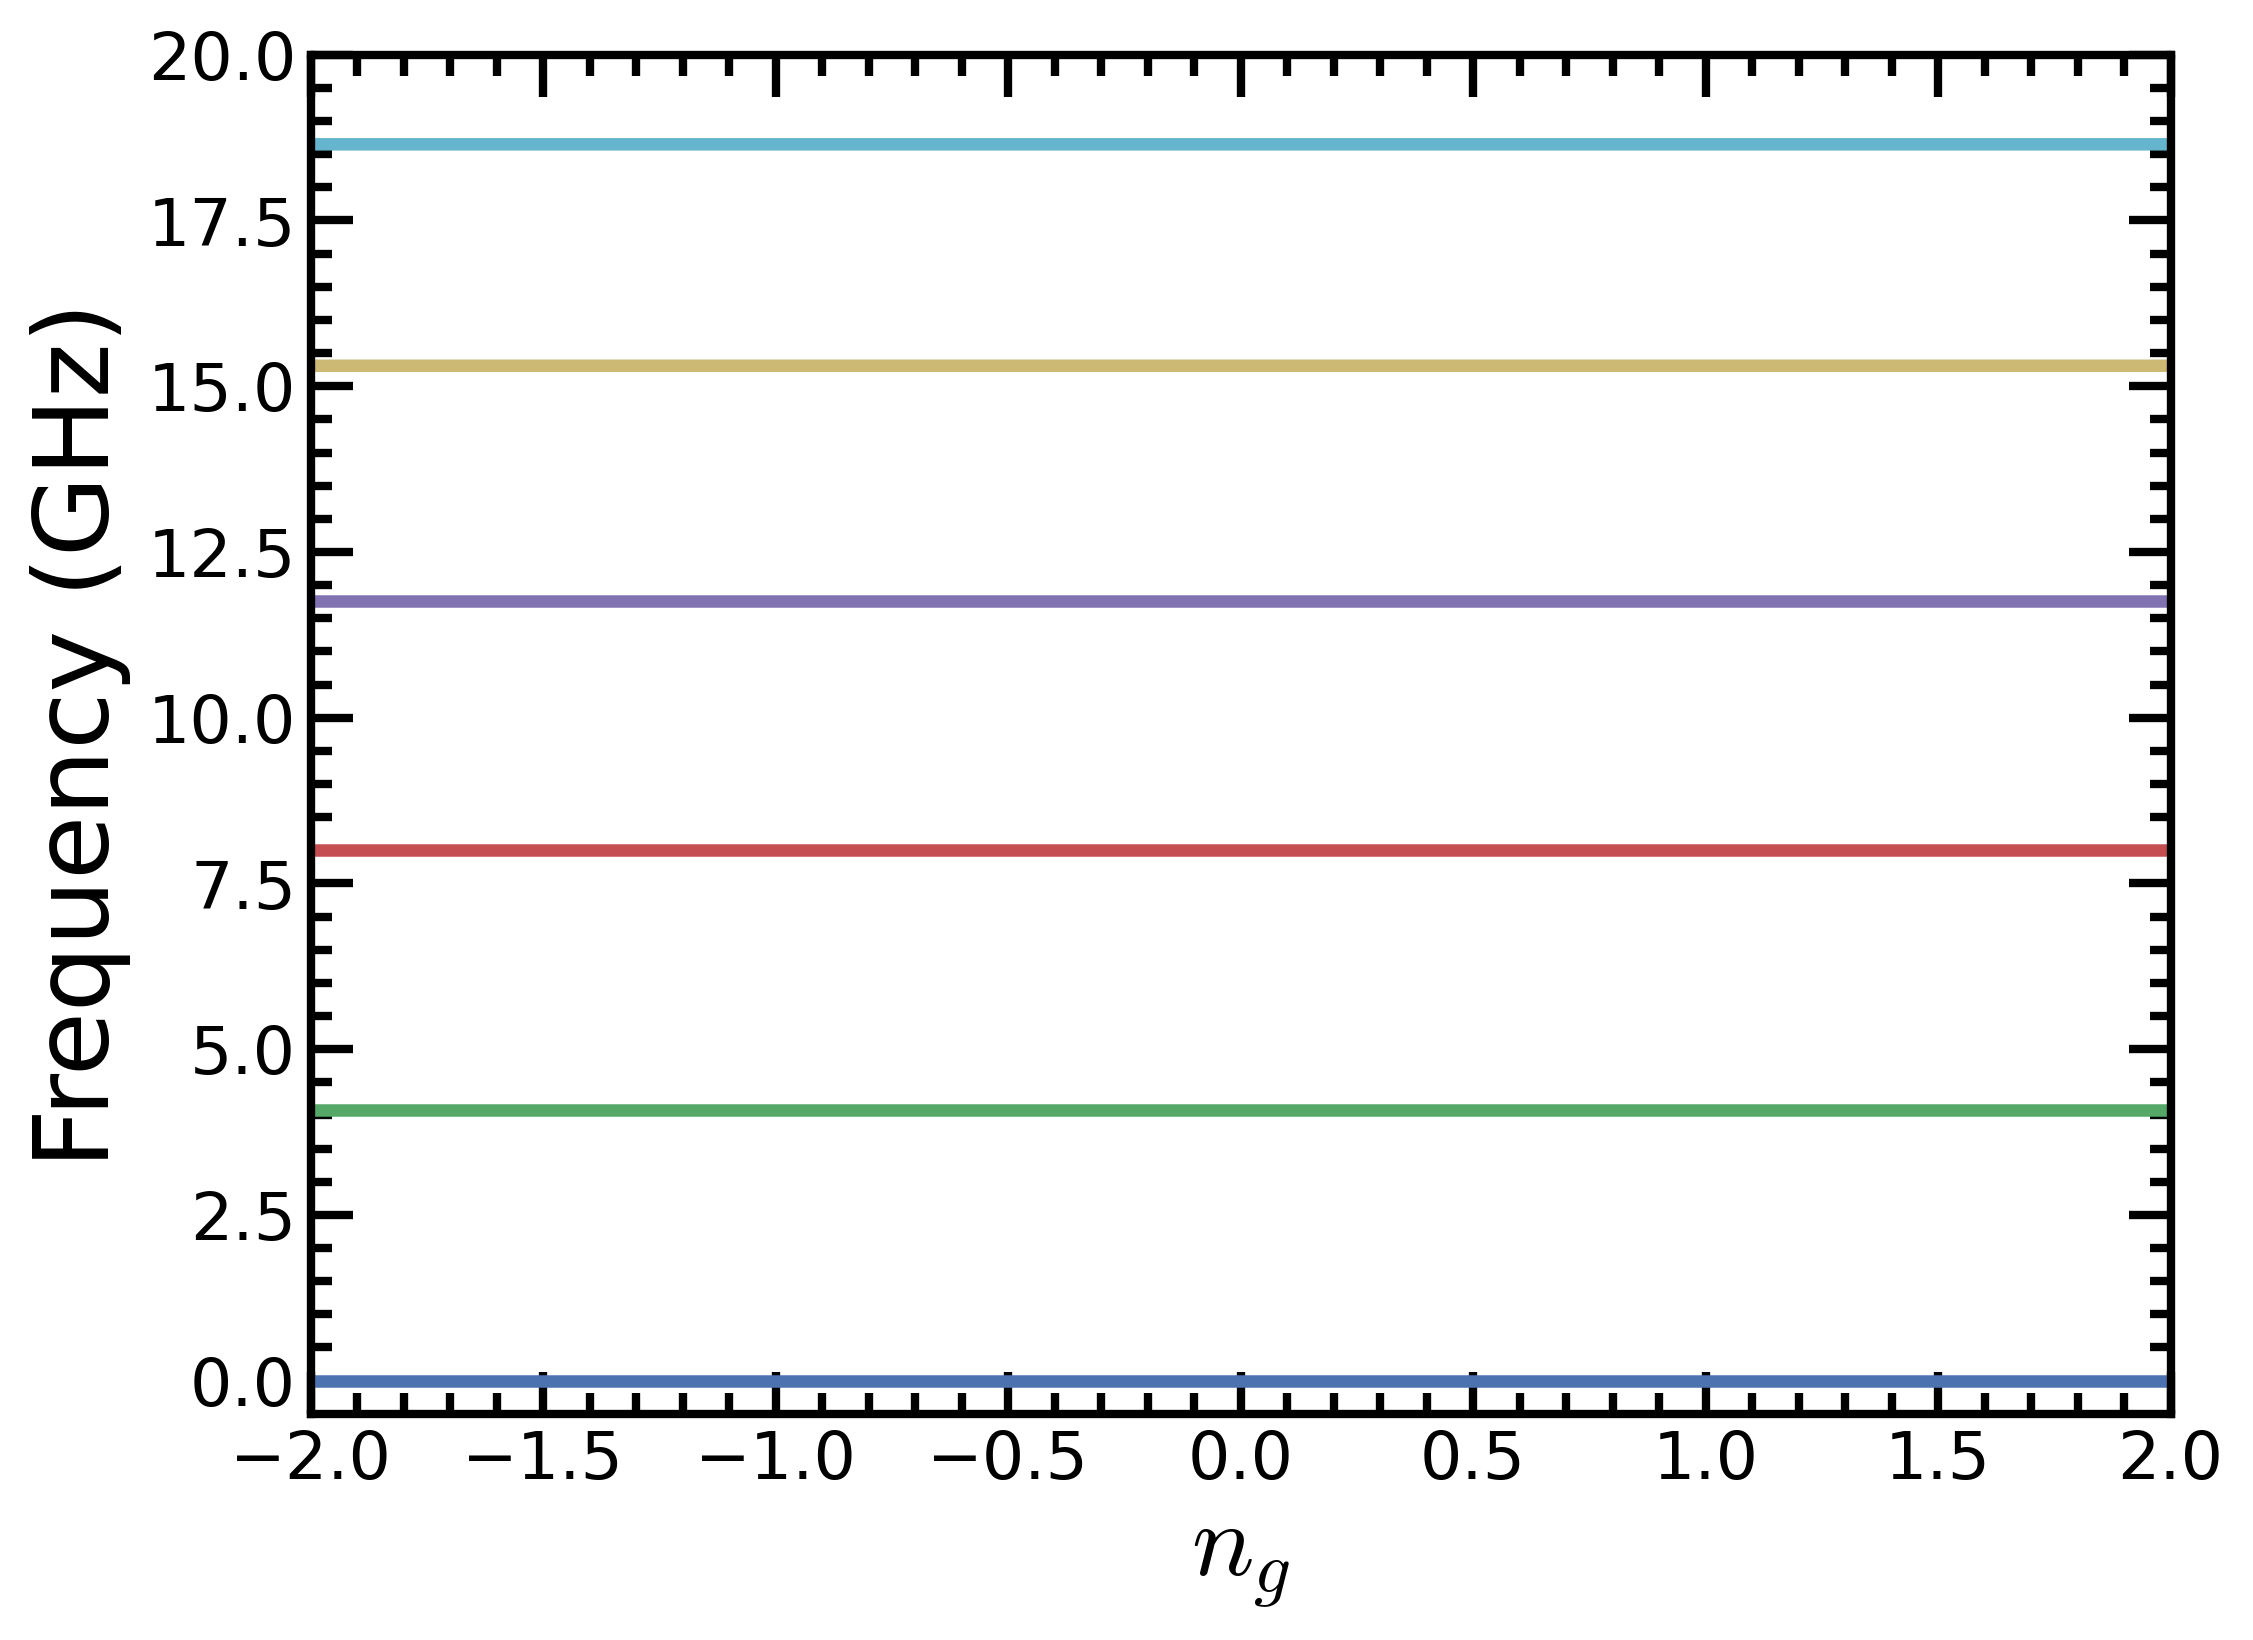

In [54]:
plt.figure(figsize=[8,6])
for idx_lvl in range(0,N):
    plt.plot(ng_array, energies[:,idx_lvl]-np.min(energies[:,0]))
plt.ylim([-0.5,20])
plt.xlabel('$n_g$')
plt.ylabel('Frequency (GHz)')
plt.xlim([ng_array[0], ng_array[-1]])

### Wave functions in charge

In [6]:
#Wavefunctions in charge basis
ng = 0.5
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   

<ipython-input-7-7c03d6058bc2>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()
/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


(-10.0, 10.0)

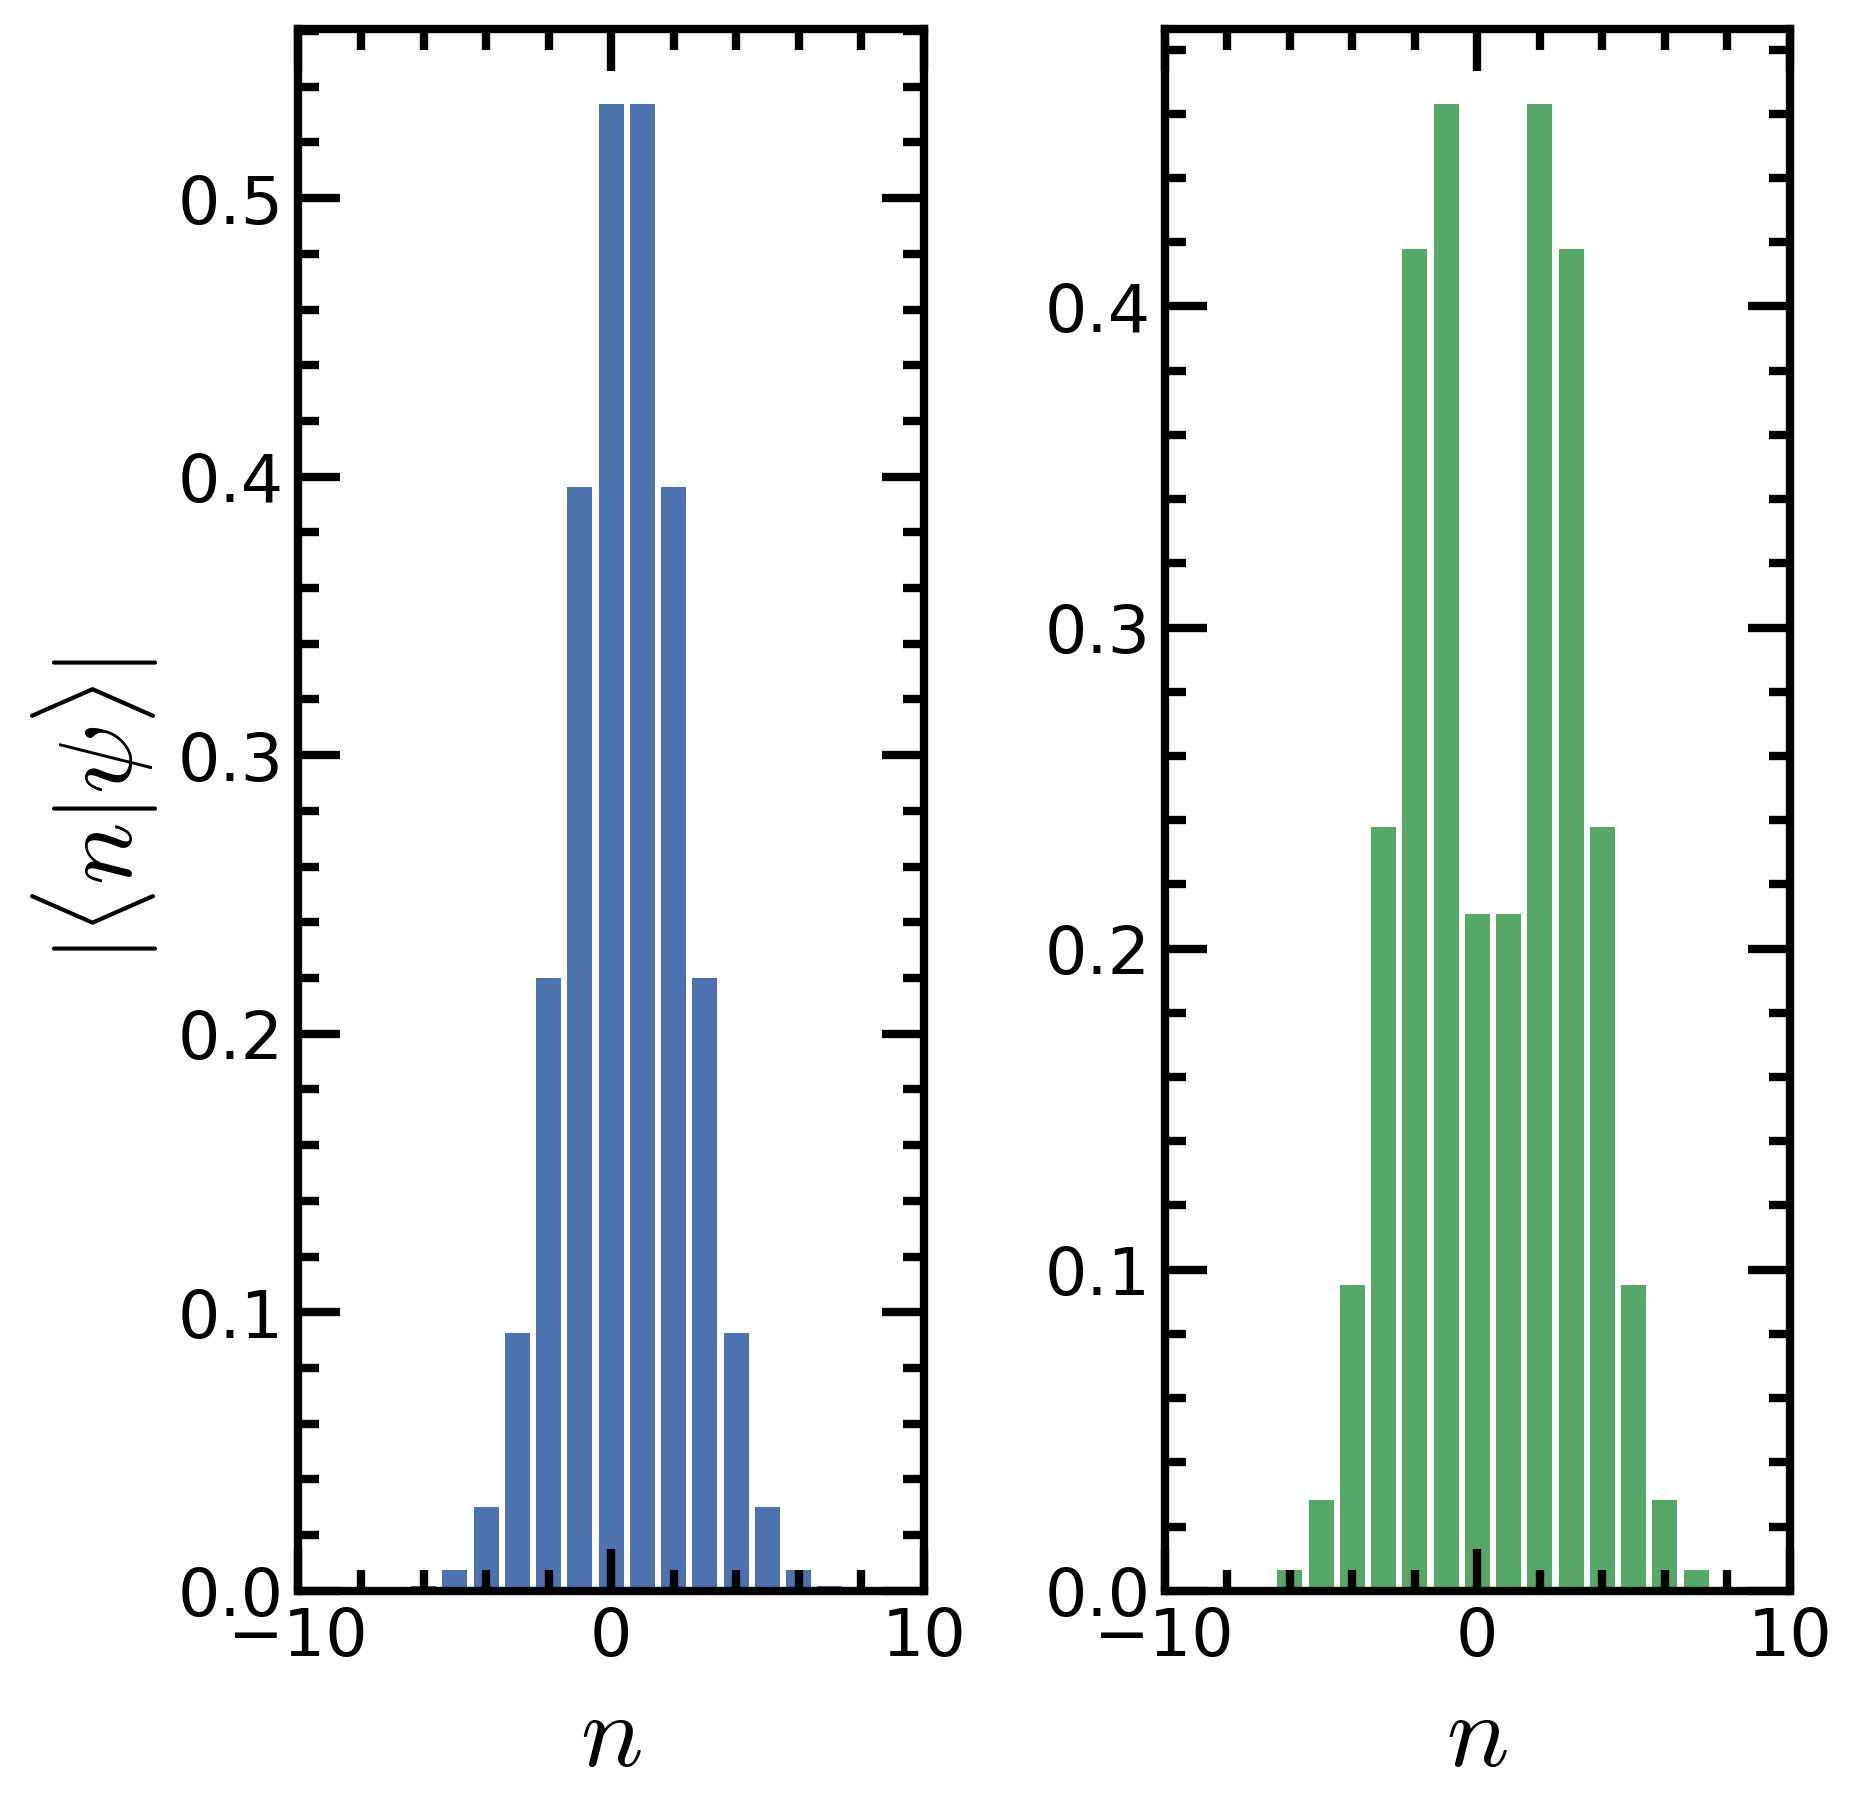

In [7]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(1,2, figsize = [6,6], constrained_layout=True)
fig.tight_layout()
# plt.subplots_adjust(left = 0, right = 1.1)

state_to_plot = 0
ax[0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0].set_xlabel('$n$')
ax[0].set_ylabel(r'$|\langle n|\psi \rangle | $')
ax[0].set_xlim([-10,10])

state_to_plot = 1
ax[1].bar(n, abs(wavefunction[state_to_plot].full()[:,0]), color = 'C1')
ax[1].set_xlabel('$n$')
# ax[1].set_ylabel(r'$|\langle n|$' + str(state_to_plot)+ r'$ \rangle |$')
ax[1].set_xlim([-10,10])

# state_to_plot = 2
# ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
# ax[1,0].set_xlabel('$n$')
# ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

# state_to_plot = 3
# ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
# ax[1,1].set_xlabel('$n$')
# ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

In [8]:
ng = 0.5
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0, 0.5, '$\\langle n|$3$ \\rangle $')

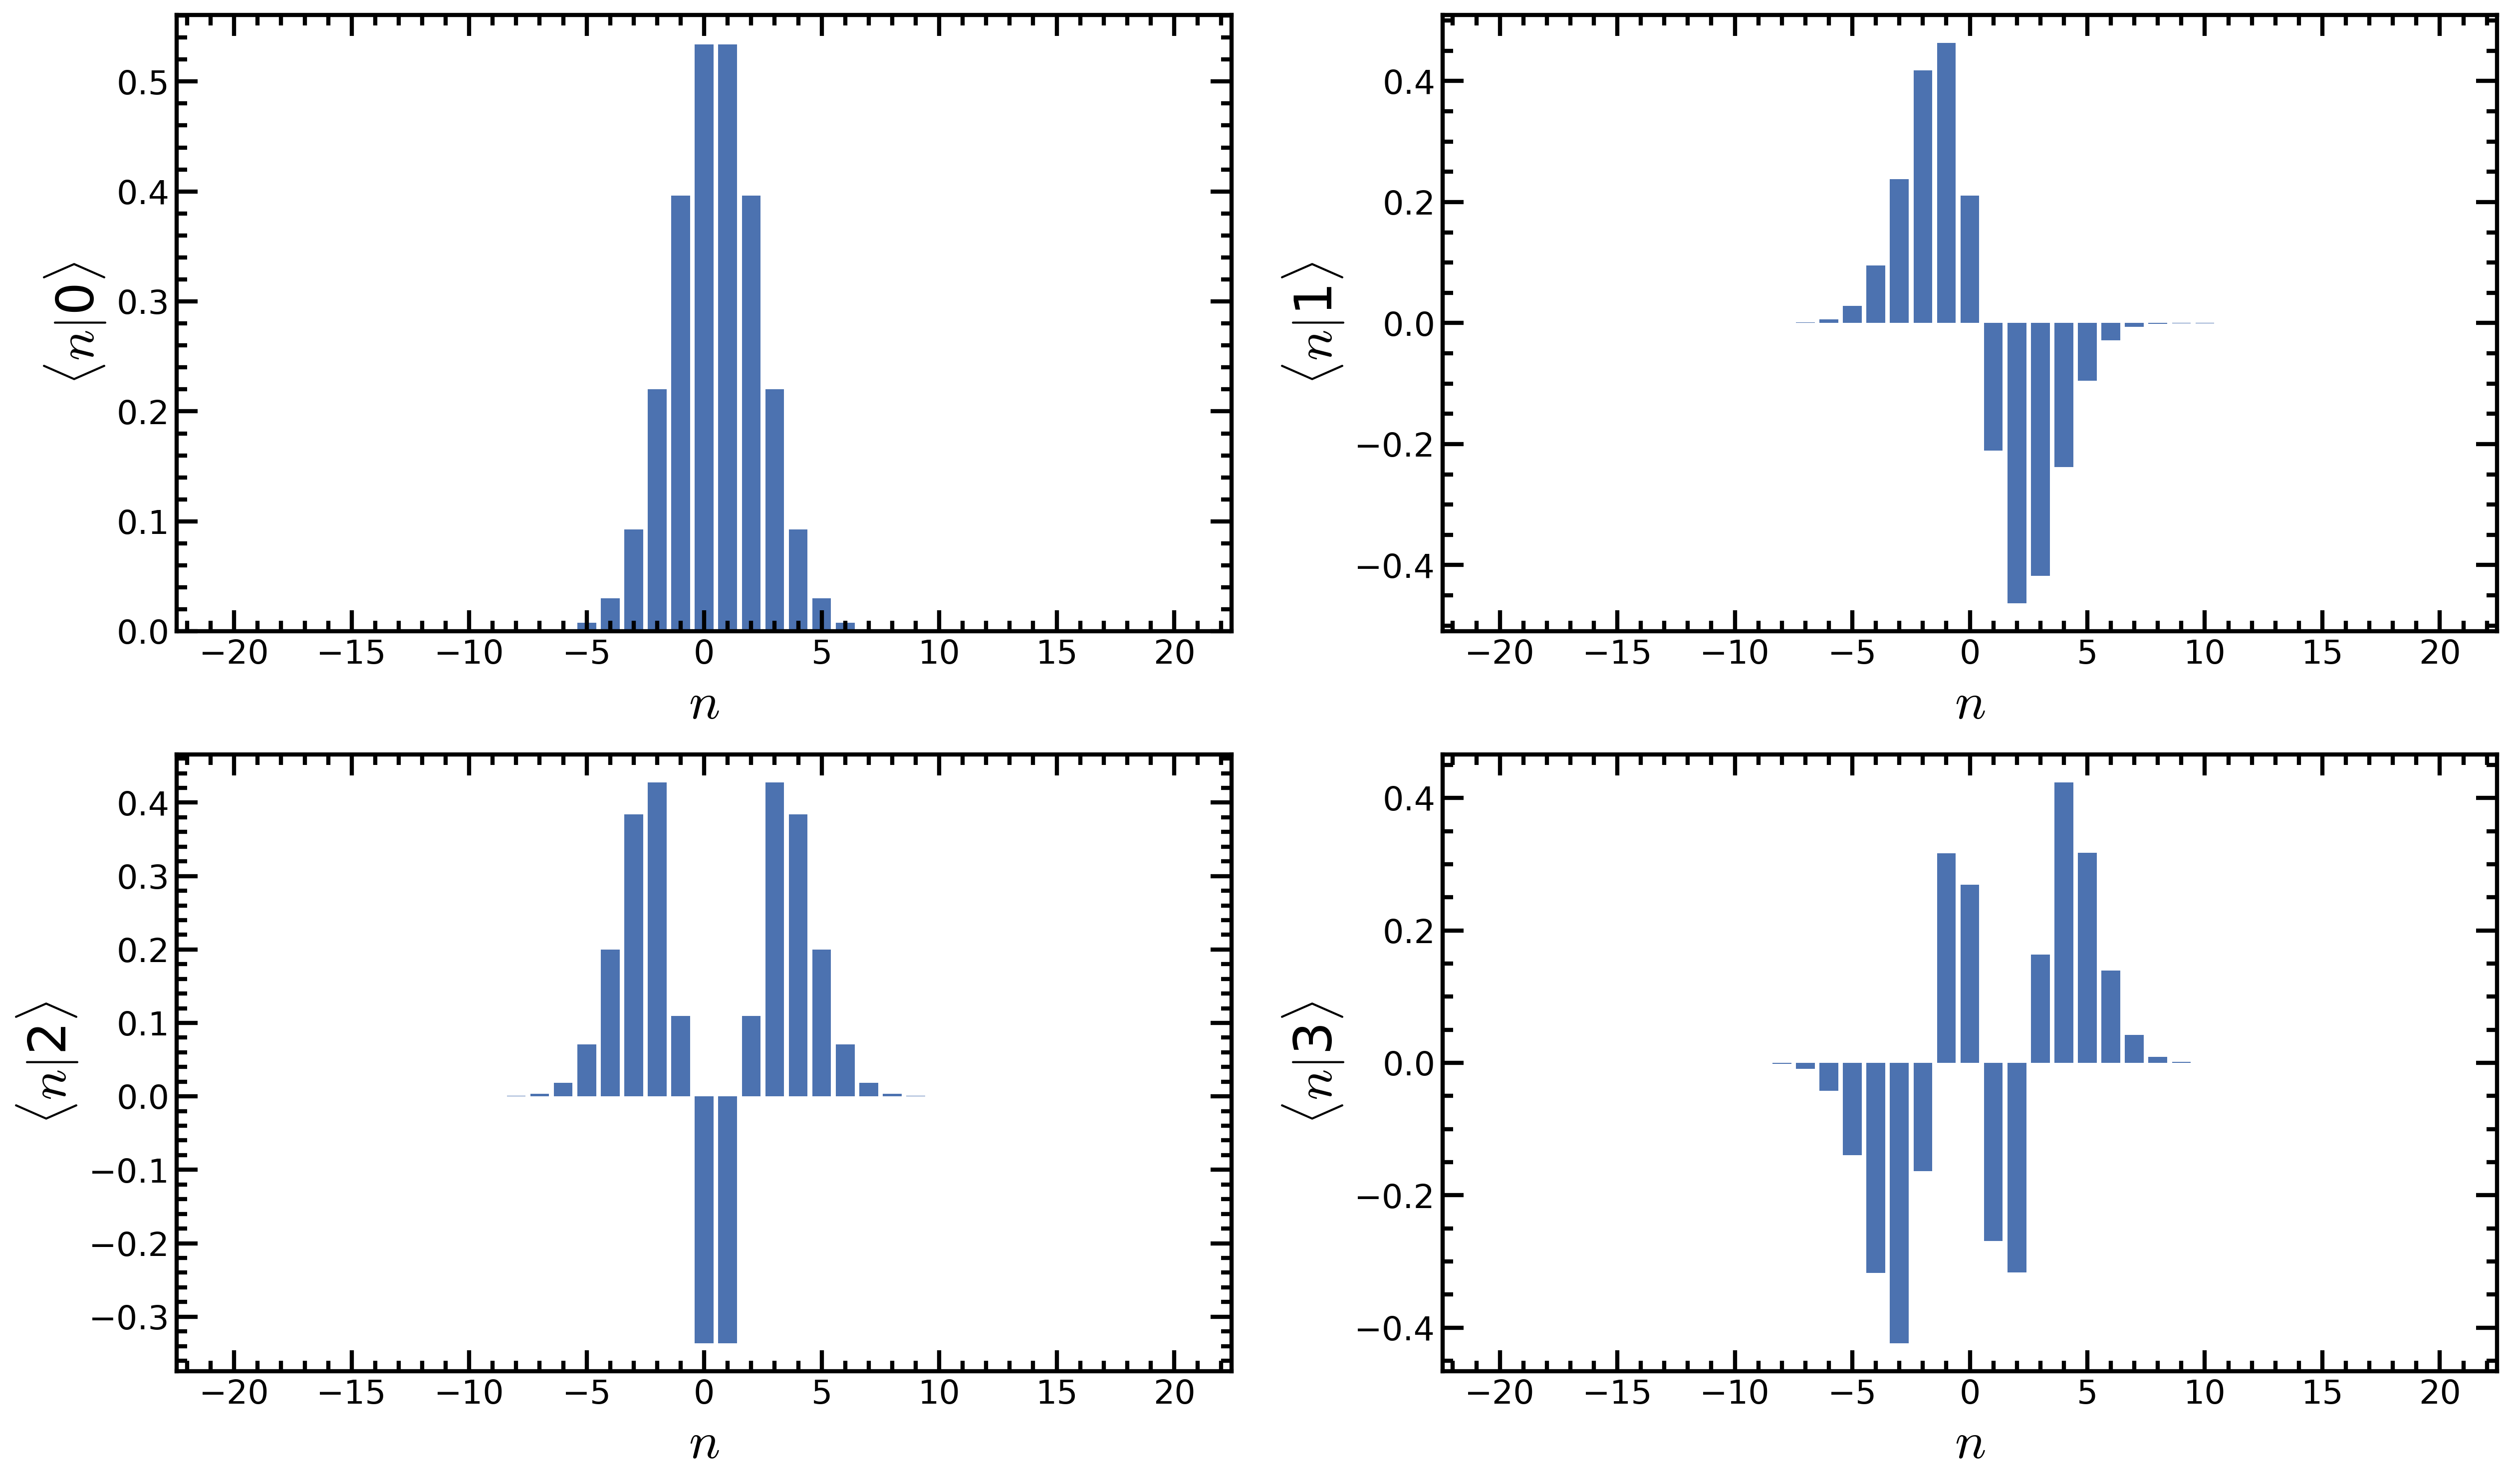

In [9]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(2,2, figsize = [20,12])

state_to_plot = 0
ax[0,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,0].set_xlabel('$n$')
ax[0,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 1
ax[0,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,1].set_xlabel('$n$')
ax[0,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 2
ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,0].set_xlabel('$n$')
ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 3
ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,1].set_xlabel('$n$')
ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

### Matrix elements

In [10]:
#Charge matrix elements
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(ng_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_ng] = n.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$n_\\mathrm{ij}$')

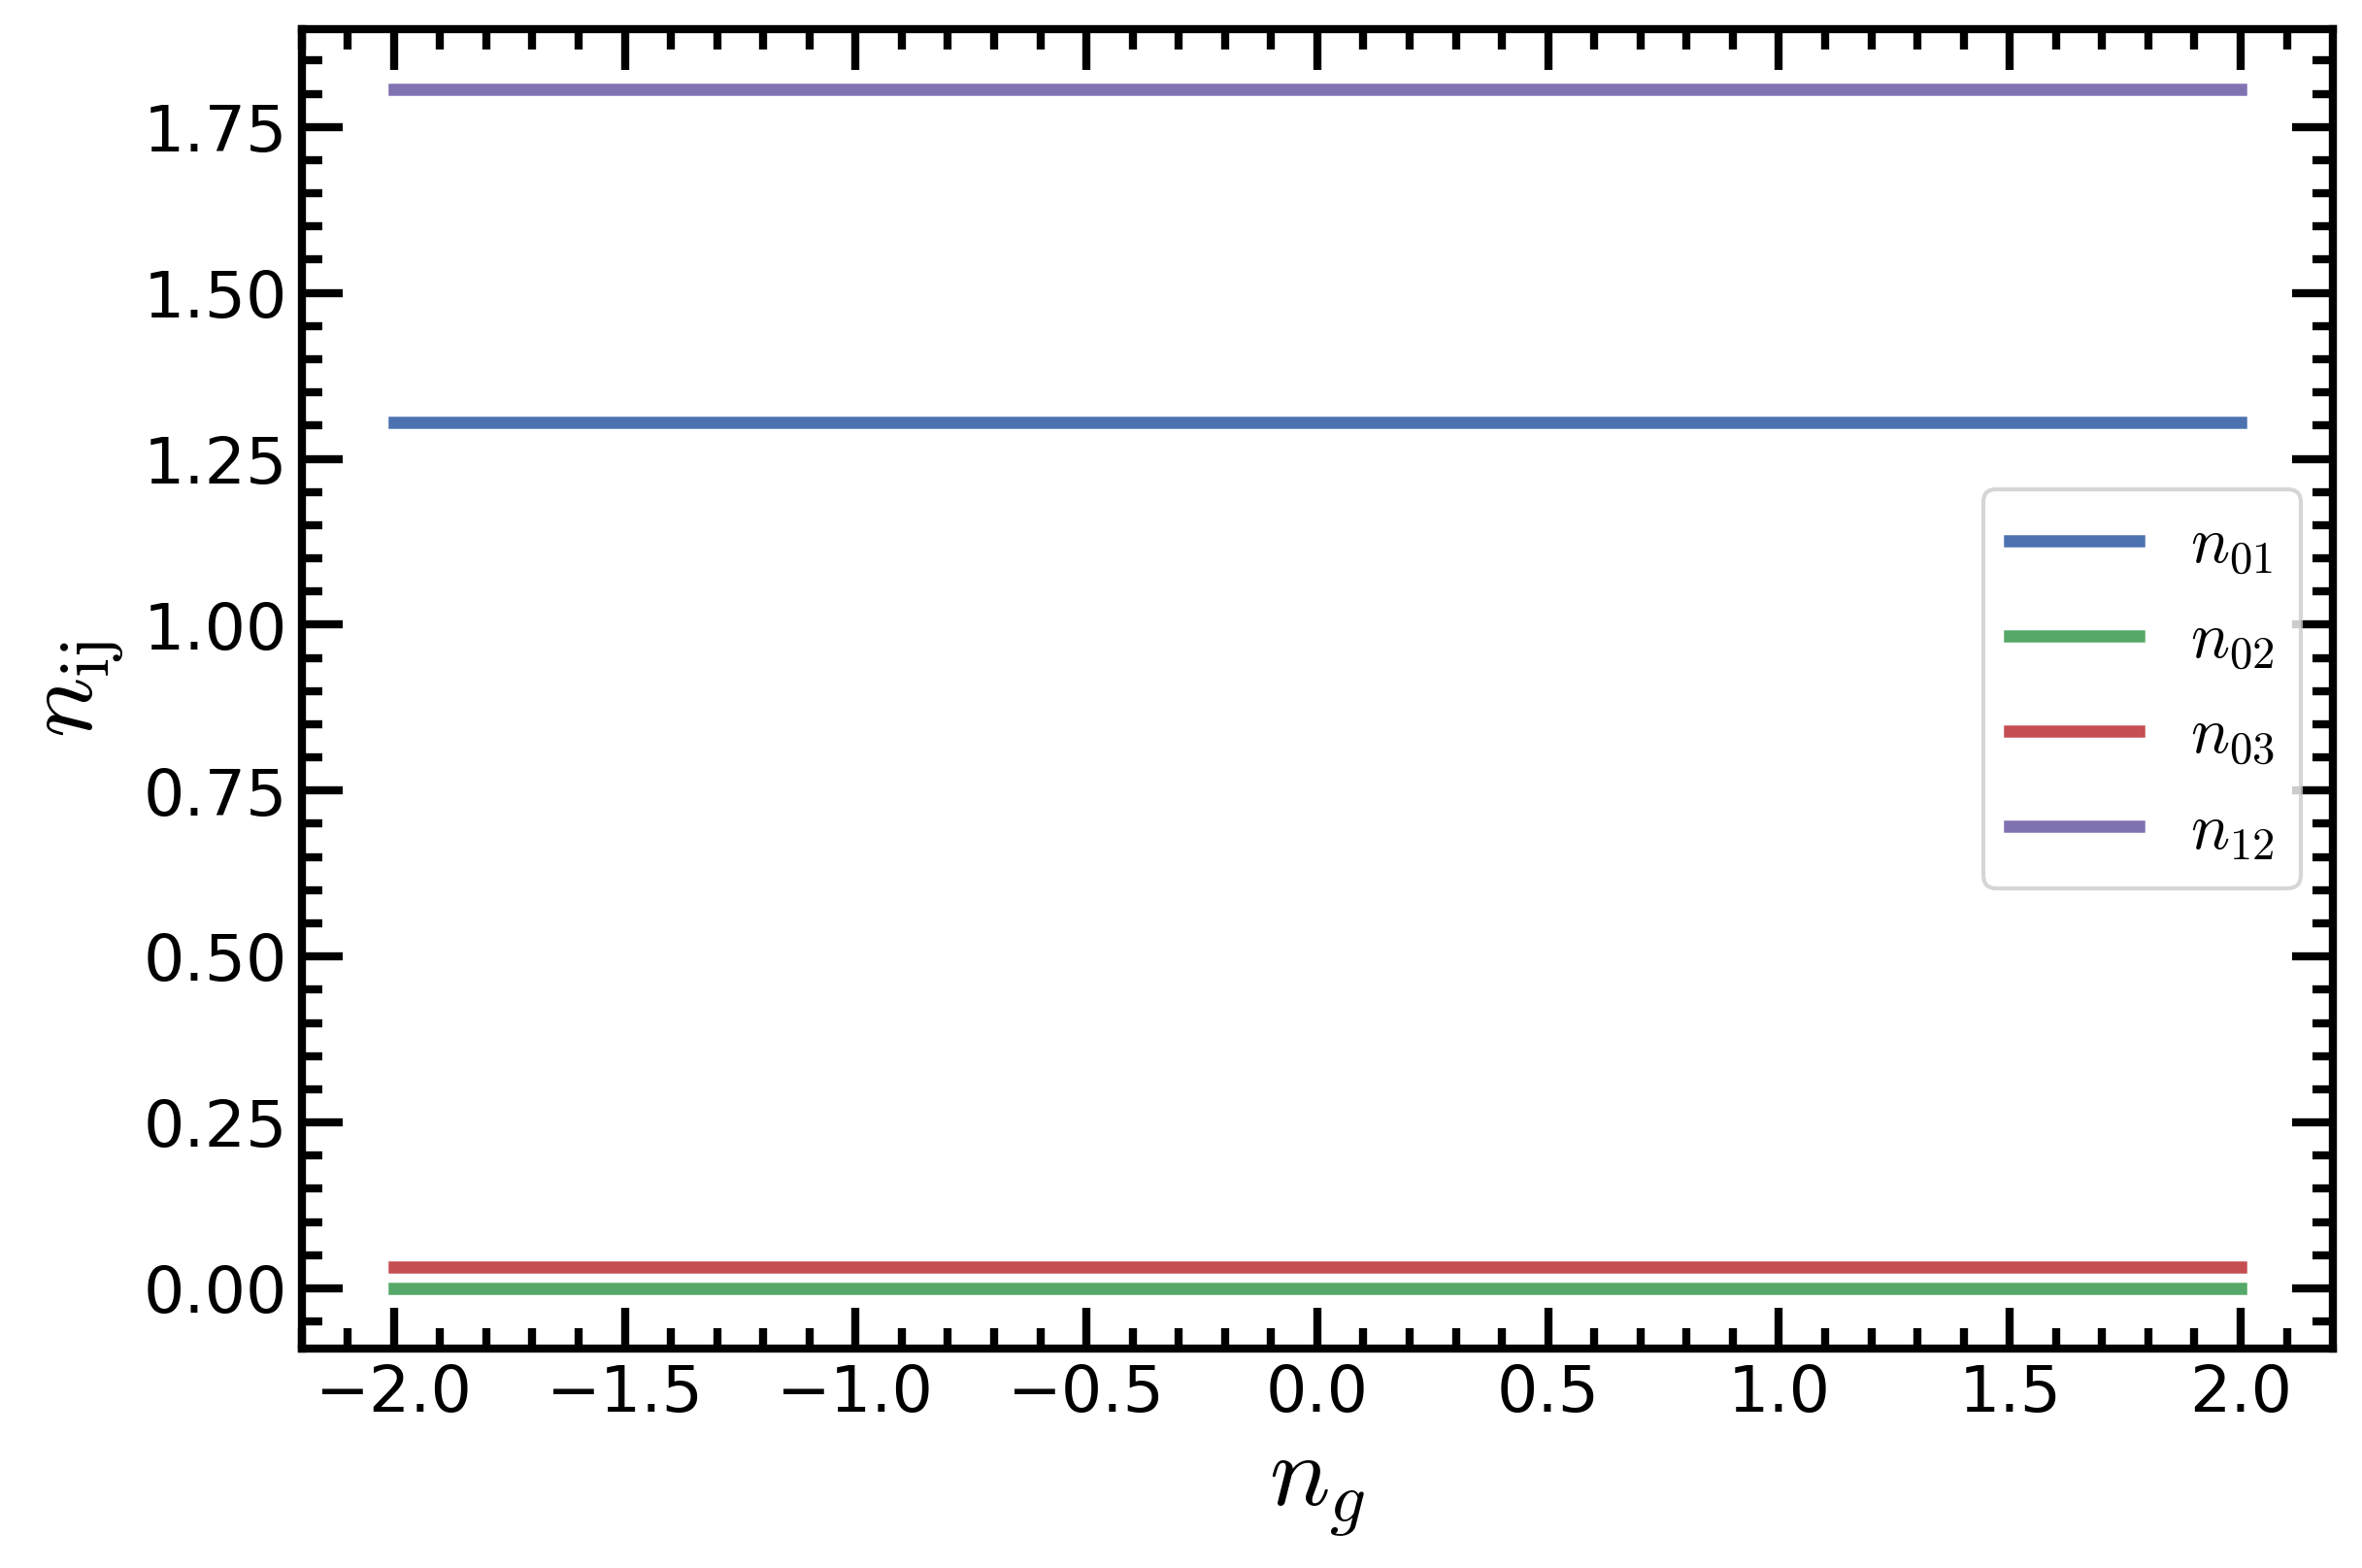

In [11]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(ng_array, abs(charge_matrix_element_02), label = '$n_{02}$')
plt.plot(ng_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(ng_array, abs(charge_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$n_\mathrm{ij}$')

In [12]:
#Phase matrix elements
phi = np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1)
phi = Qobj(phi)
phi_matrix_element_01 = np.zeros_like(charge_matrix_element_01)
phi_matrix_element_02 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_03 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_12 = np.zeros_like(phi_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    phi_matrix_element_01[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[1])
    phi_matrix_element_02[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[2])
    phi_matrix_element_03[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[3])
    phi_matrix_element_12[idx_ng] = phi.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$\\phi_\\mathrm{ij}$')

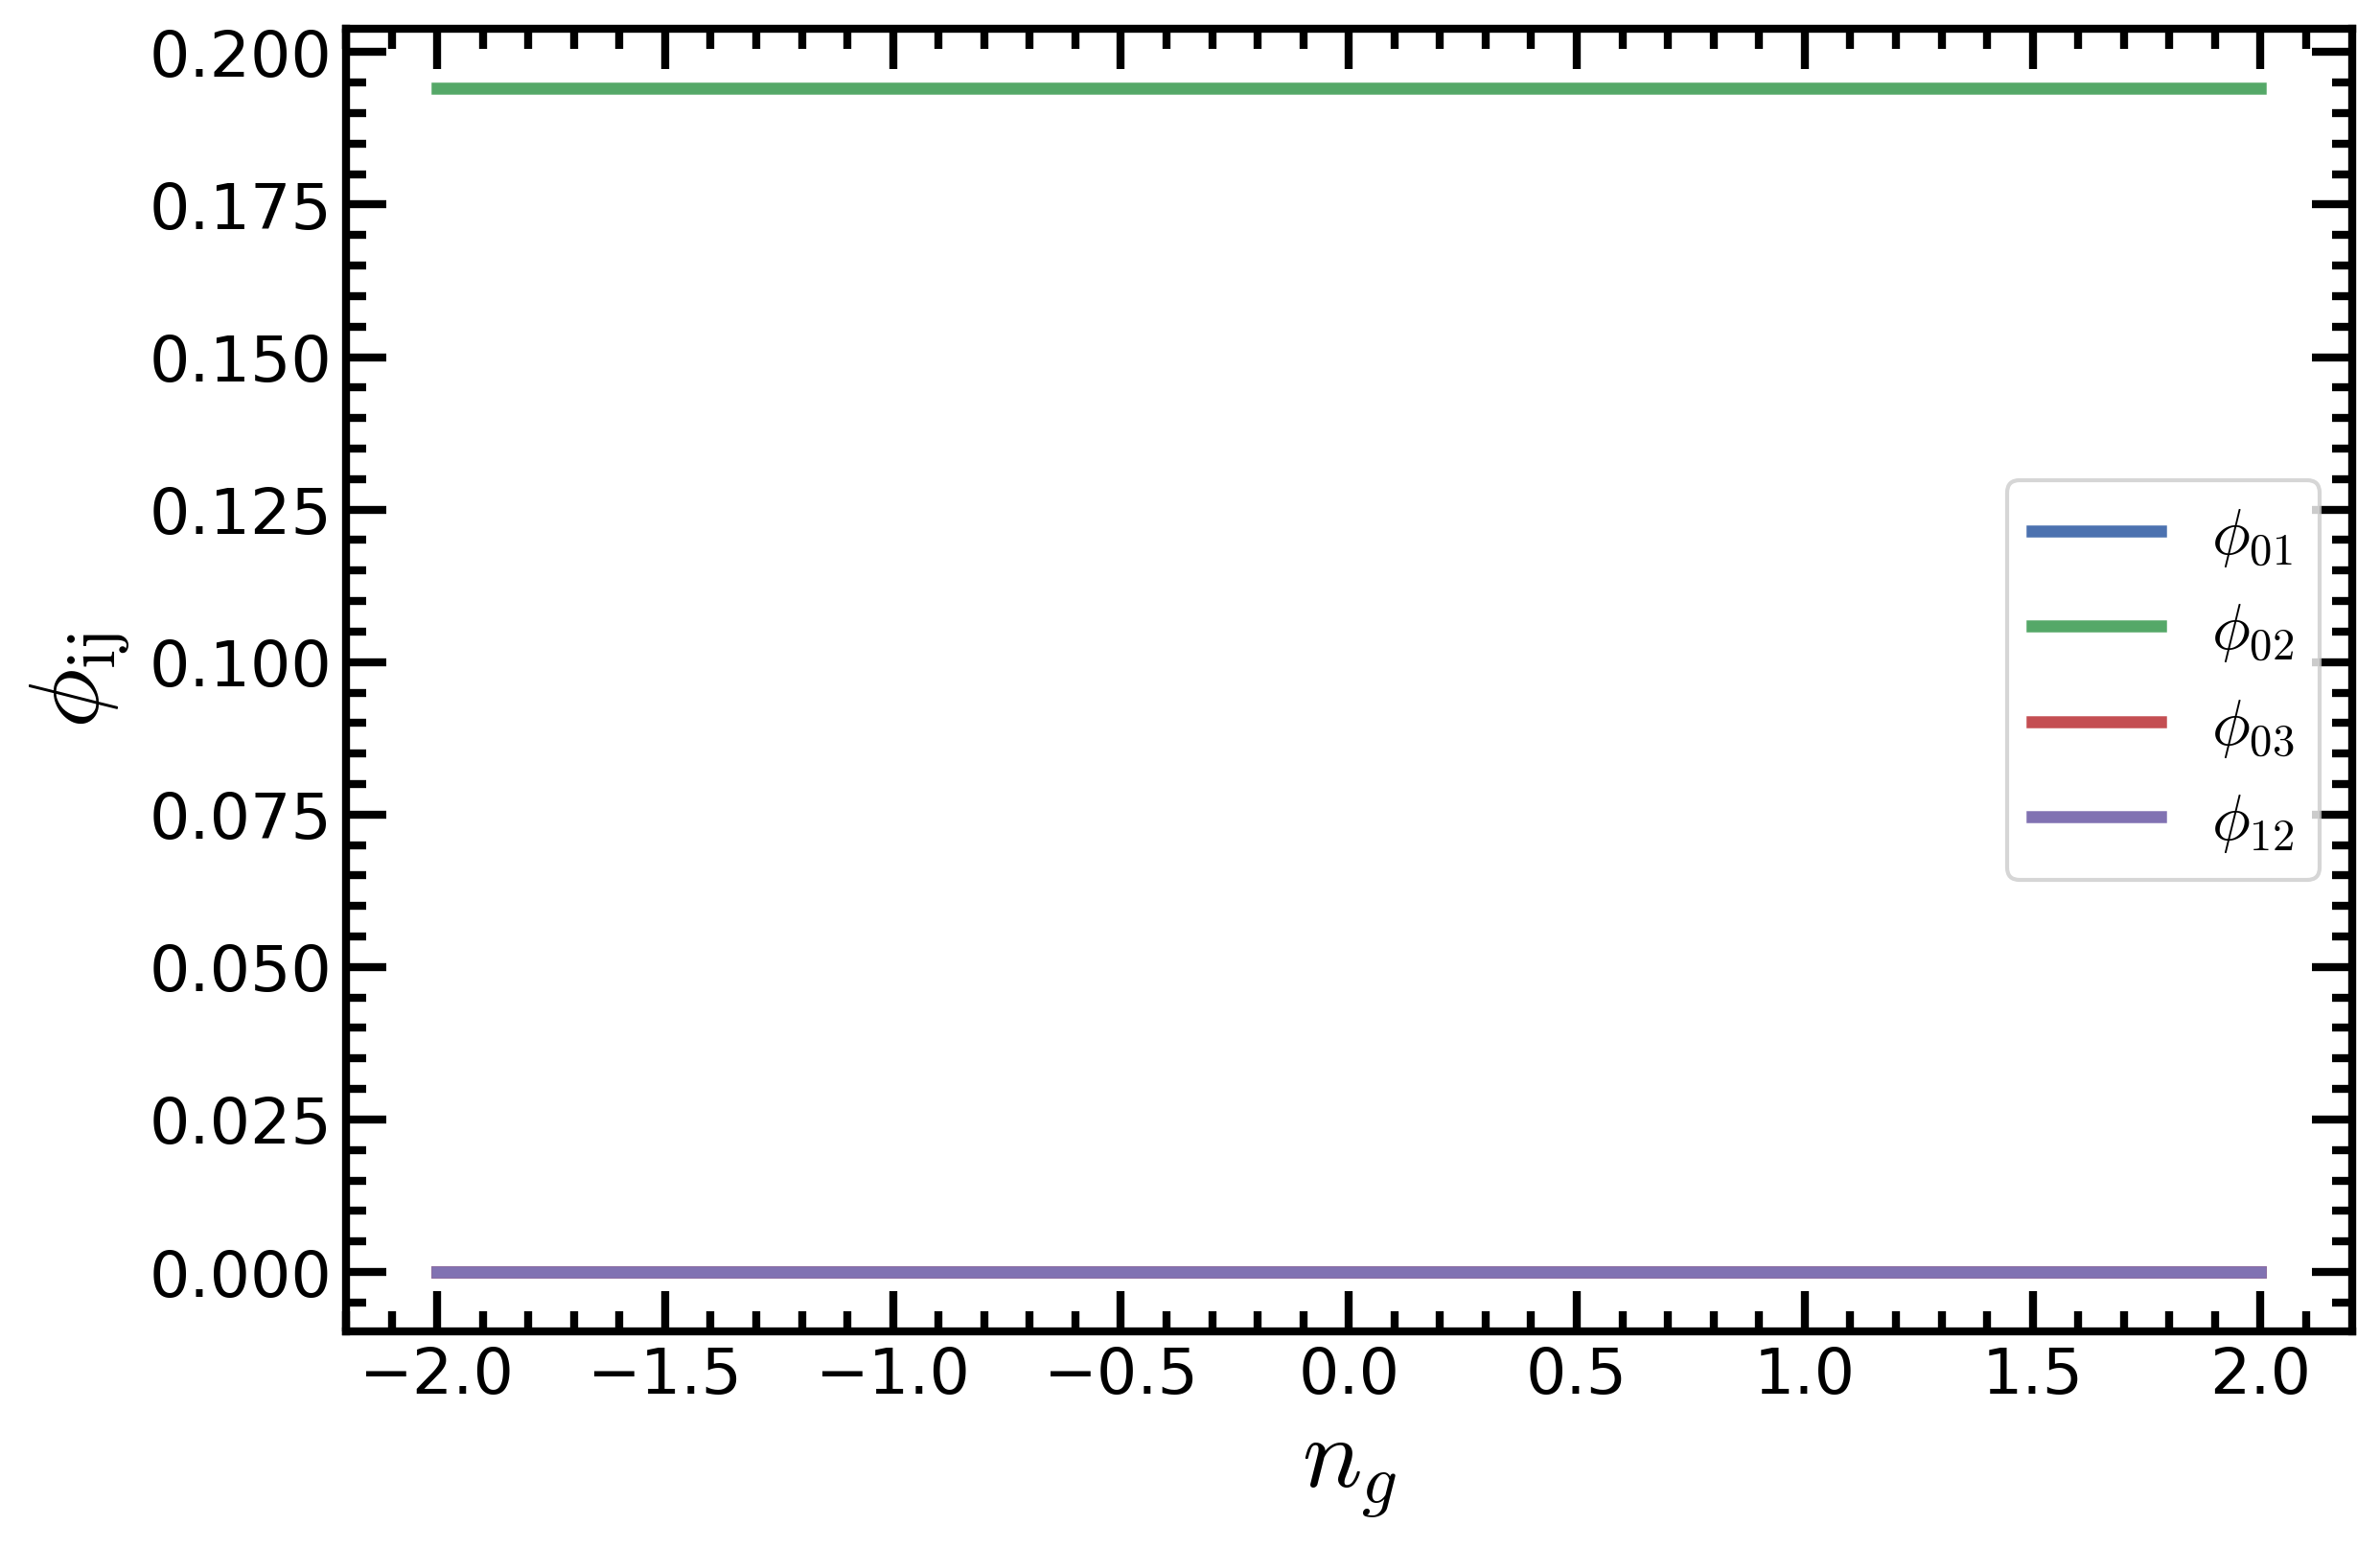

In [13]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(phi_matrix_element_01), label = '$\phi_{01}$')
plt.plot(ng_array, abs(phi_matrix_element_02), label = '$\phi_{02}$')
plt.plot(ng_array, abs(phi_matrix_element_03), label = '$\phi_{03}$')
plt.plot(ng_array, abs(phi_matrix_element_12), label = '$\phi_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$\phi_\mathrm{ij}$')

In [14]:
#Sweep parameters
#Charge matrix elements in this case
ng = 0
Ec = 1
Ej_array = np.linspace(0,100,1001)
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(Ej_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_Ej, Ej in enumerate(Ej_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_Ej] = n.matrix_element(wavefunction[1], wavefunction[2])


(0.0, 100.0)

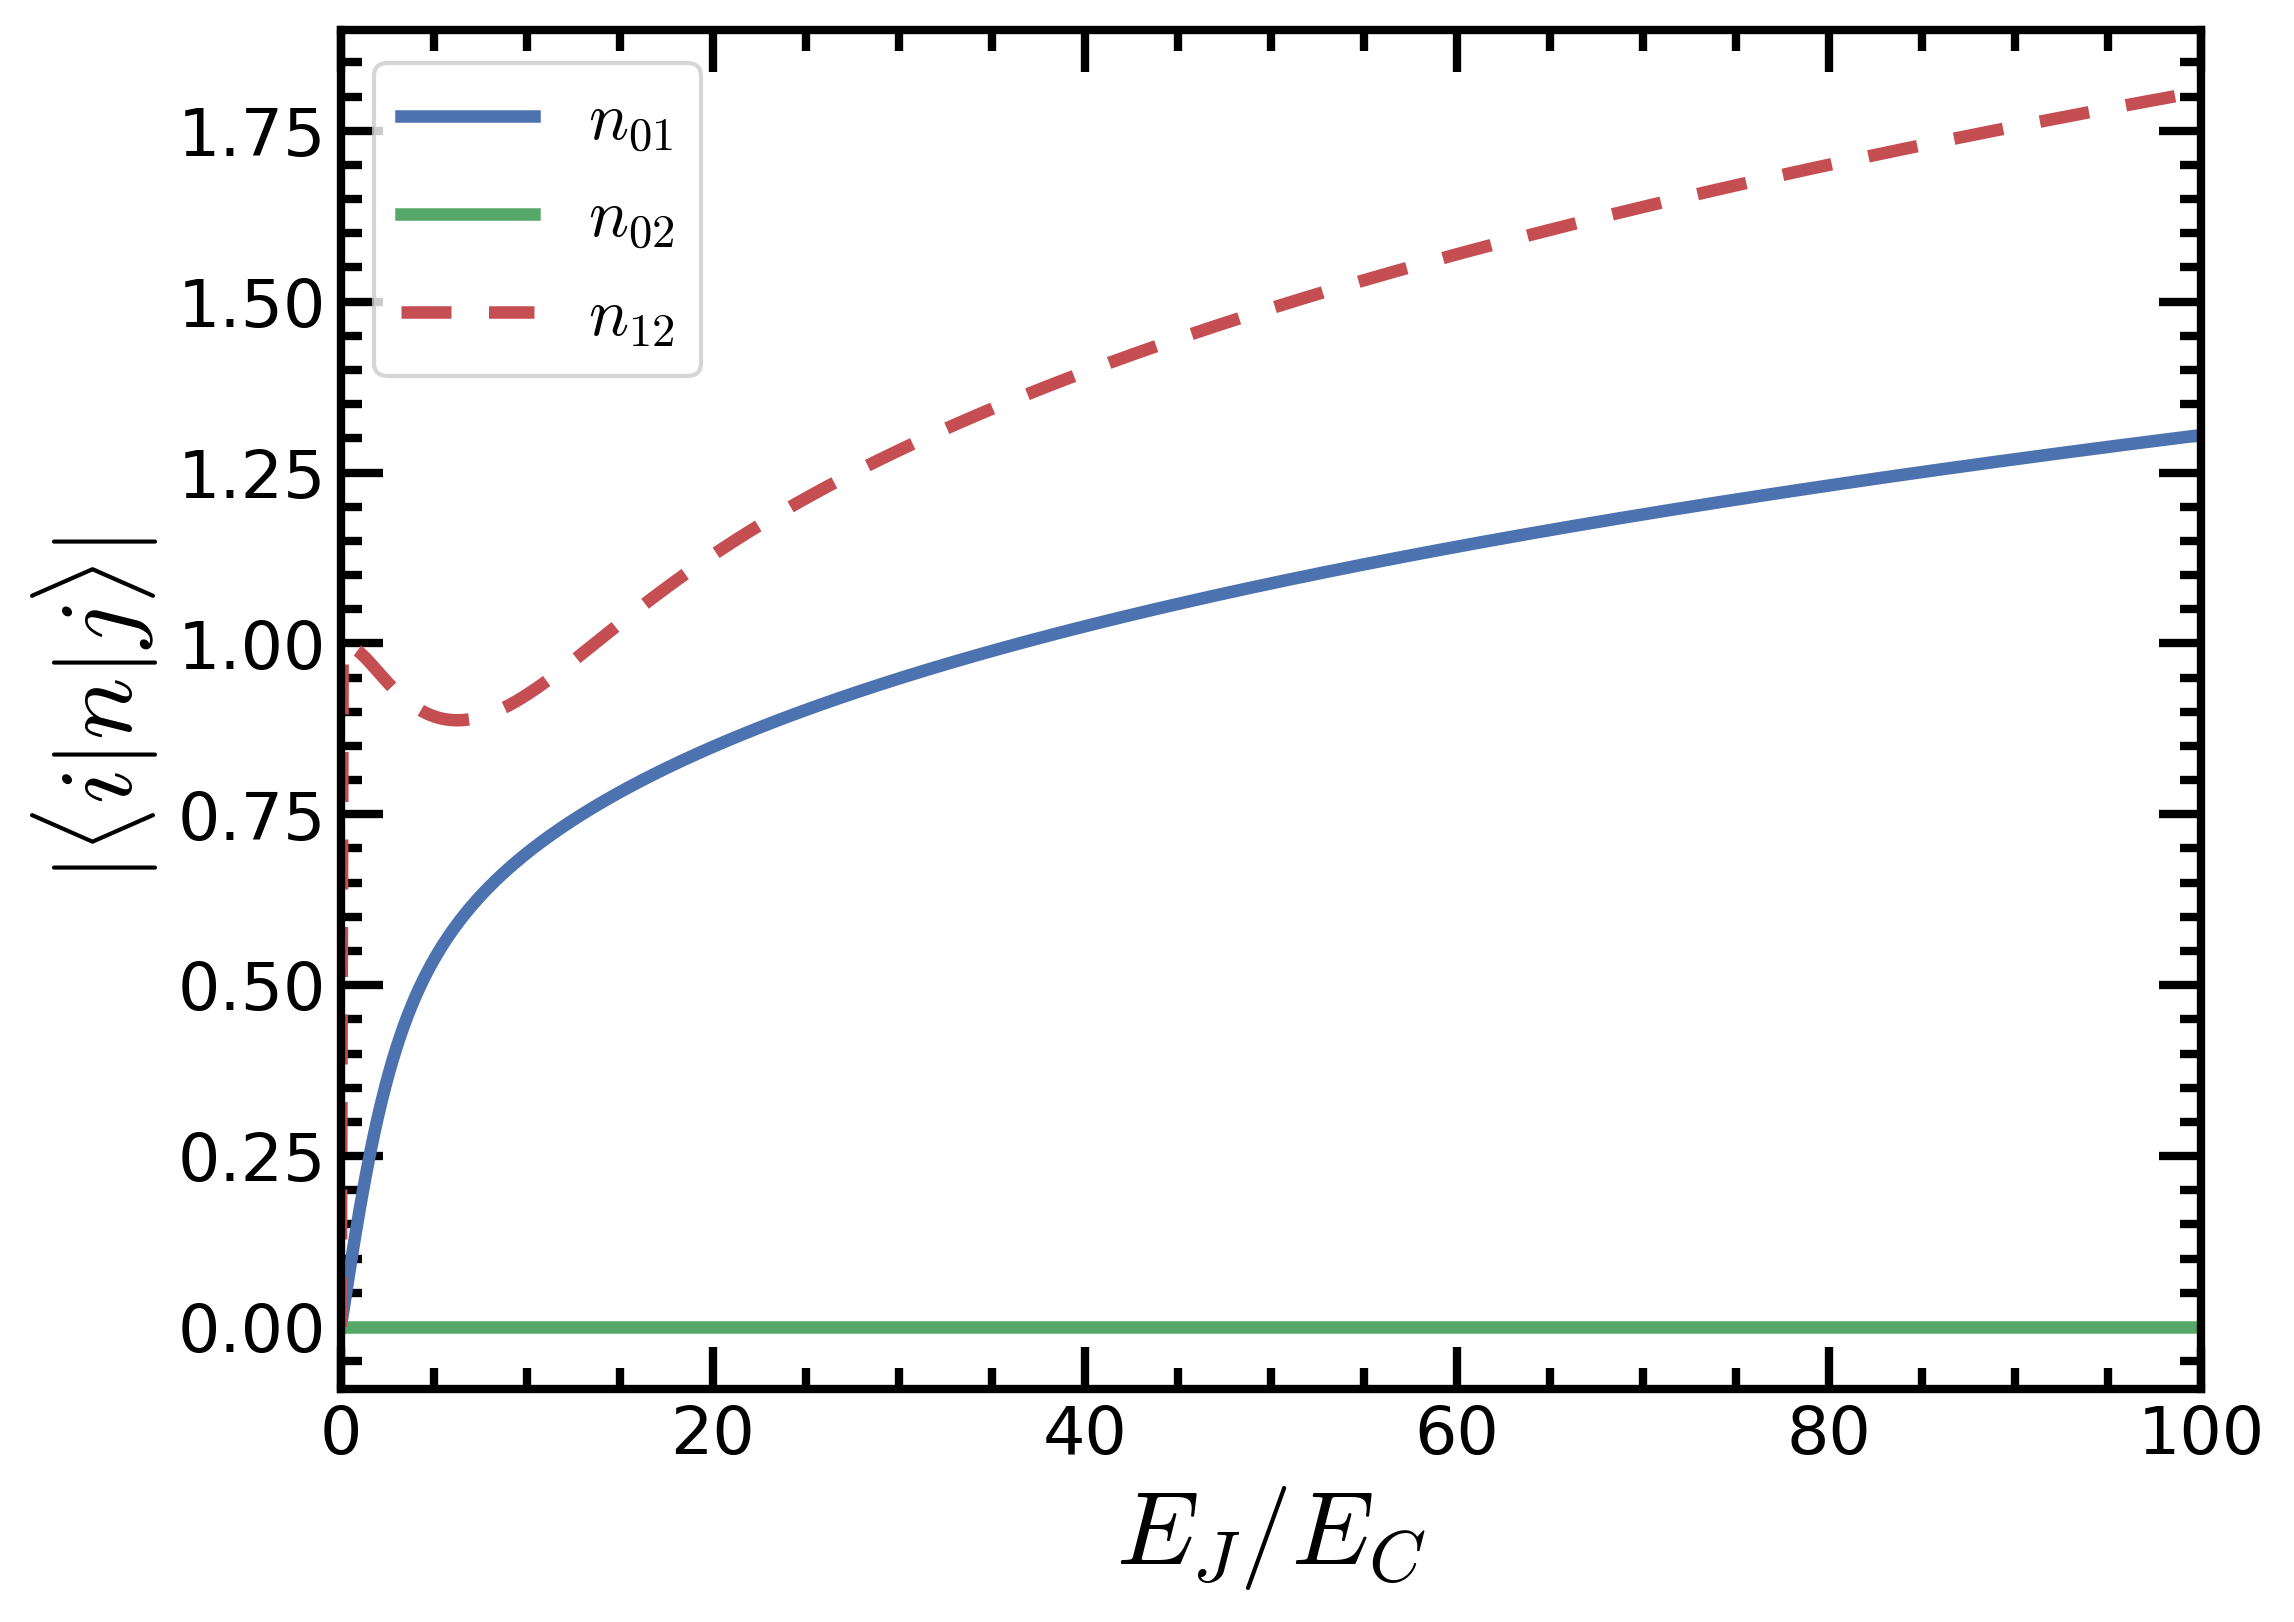

In [15]:
plt.figure(figsize = [8,6])
plt.plot(Ej_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(Ej_array, abs(charge_matrix_element_02), label = '$n_{02}$')
# plt.plot(Ej_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(Ej_array, abs(charge_matrix_element_12), linestyle = '--', label = '$n_{12}$')
plt.legend()
plt.xlabel('$E_J/E_C$')
plt.ylabel(r'$|\langle i| n | j \rangle |$')
# plt.title('$n_g=0$')
plt.xlim([0,100])


In [16]:
#Sweep parameters
#Charge matrix elements in this case
ng = 0.5
for idx_Ej, Ej in enumerate(Ej_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[2])
#     charge_matrix_element_03[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_Ej] = n.matrix_element(wavefunction[1], wavefunction[2])

(0.0, 100.0)

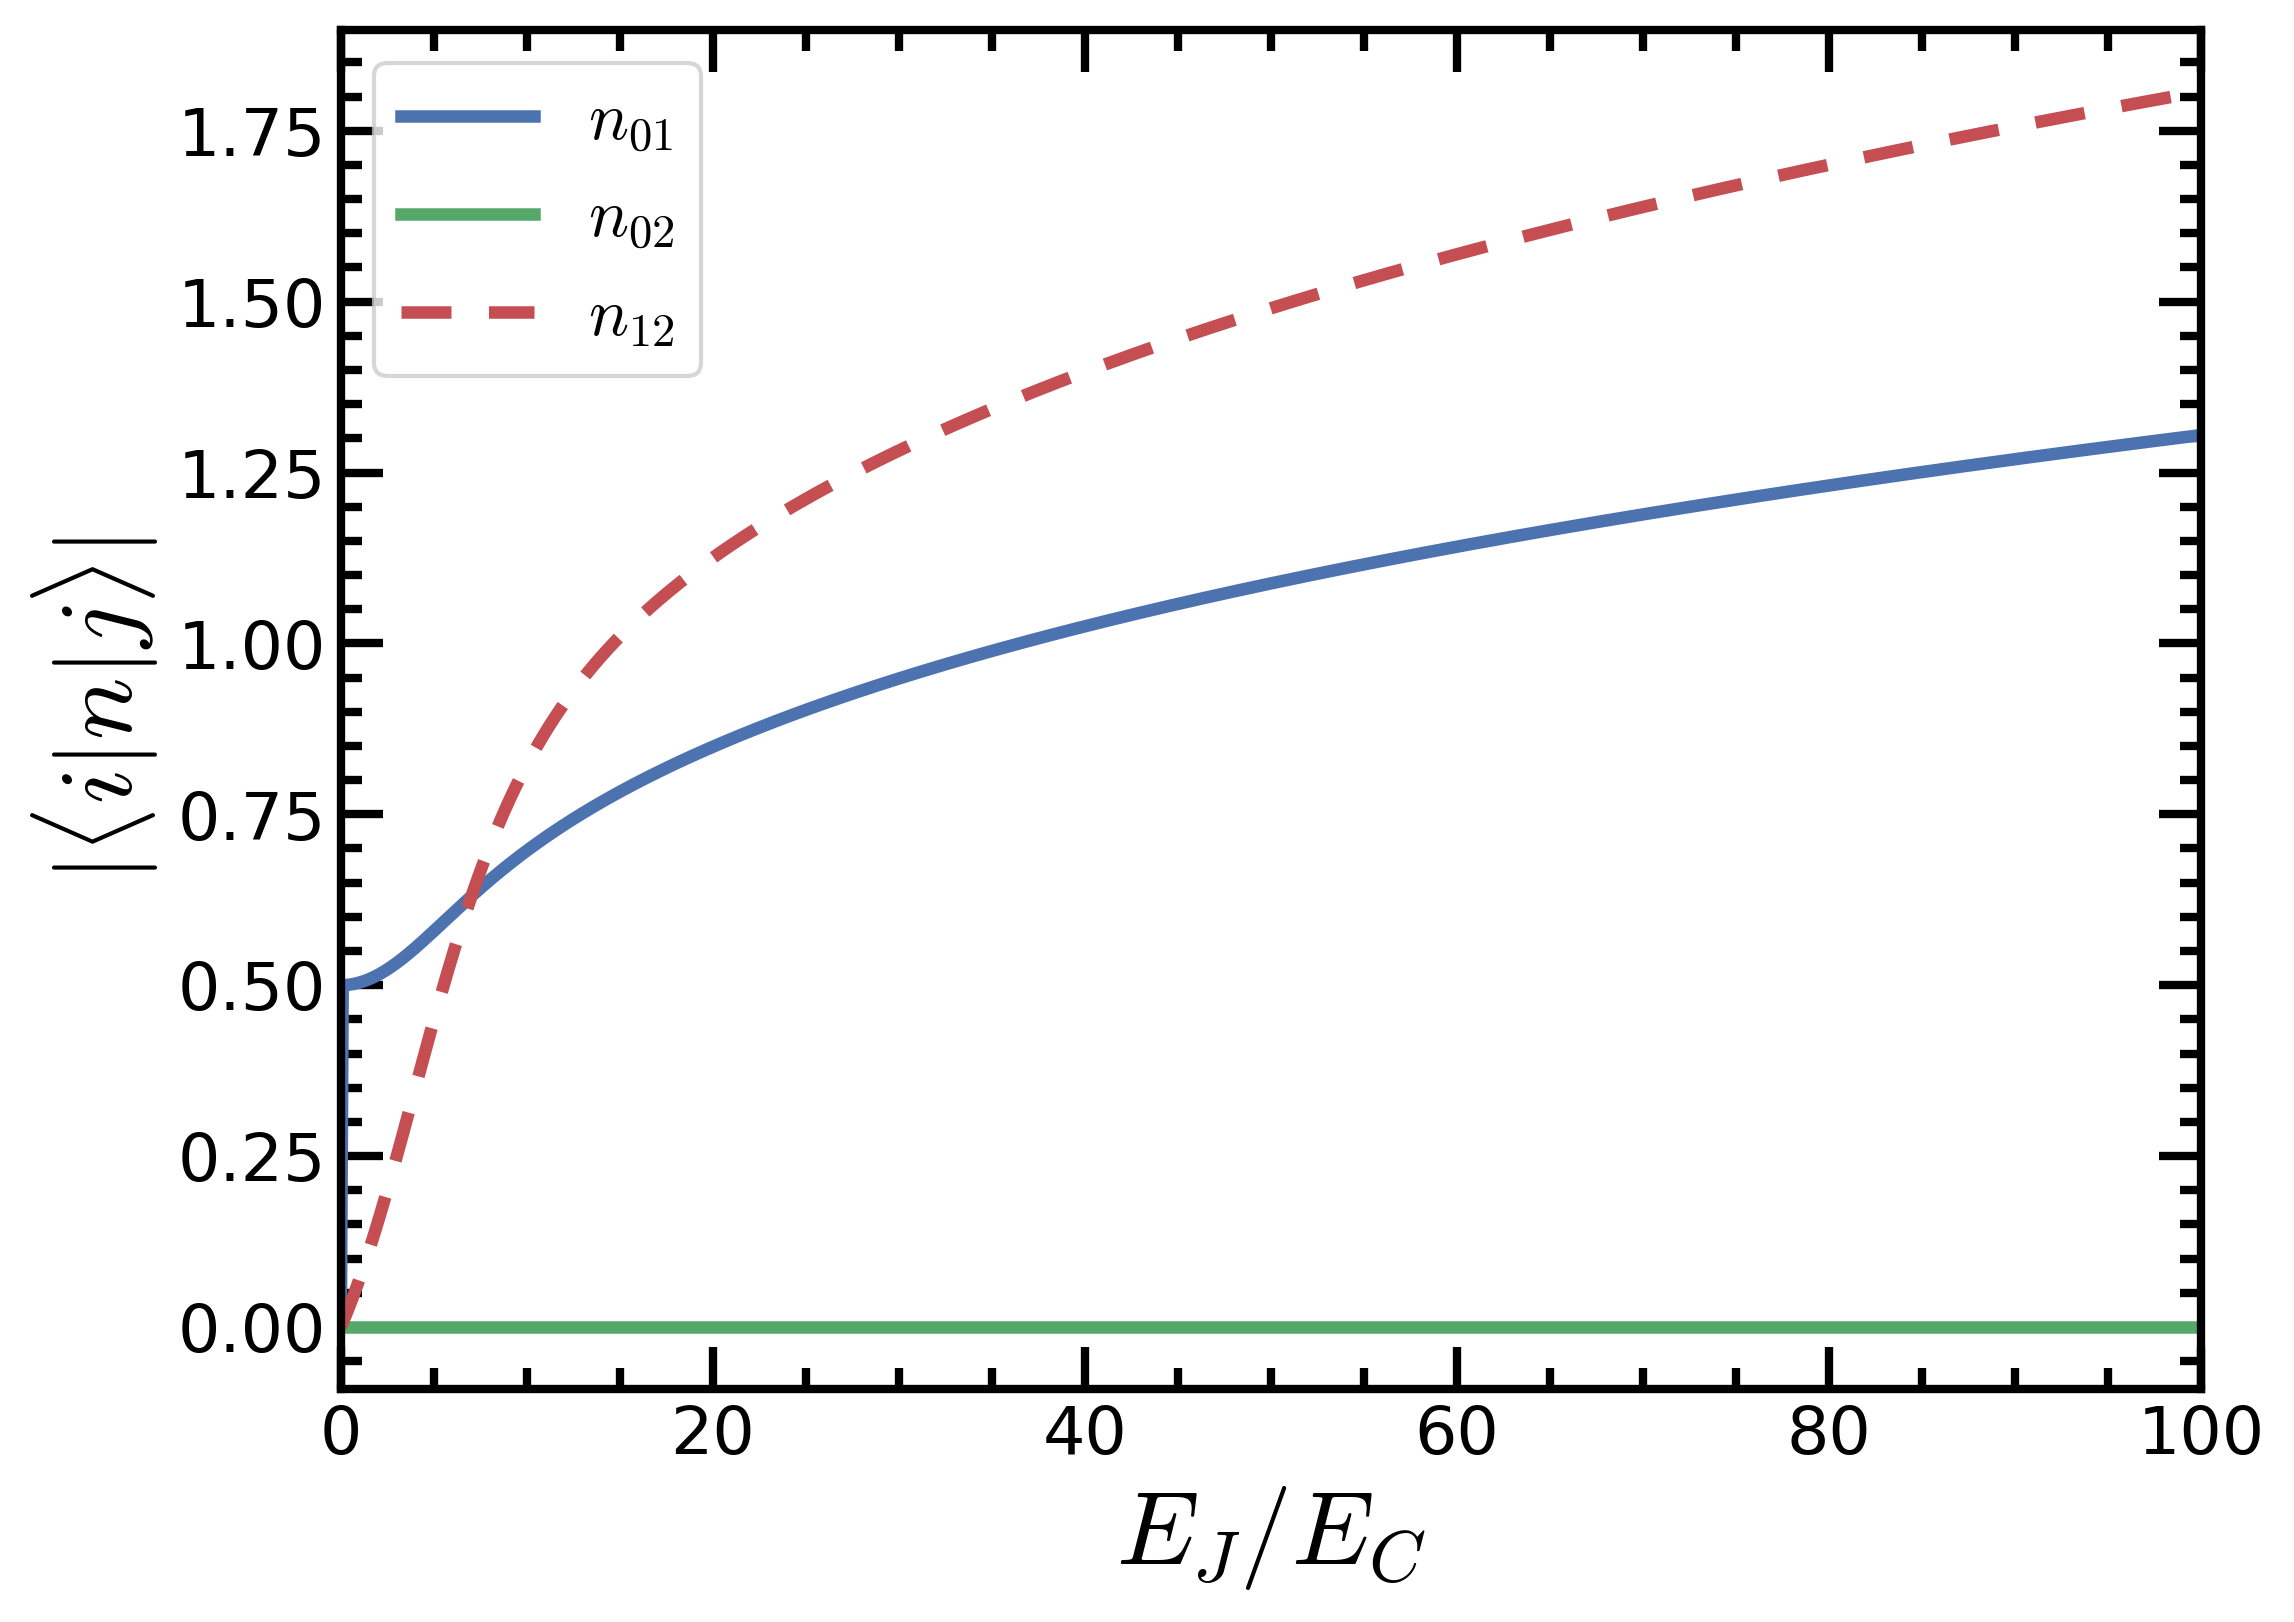

In [23]:
plt.figure(figsize = [8,6])
plt.plot(Ej_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(Ej_array, abs(charge_matrix_element_02), label = '$n_{02}$')
# plt.plot(Ej_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(Ej_array, abs(charge_matrix_element_12), linestyle = '--', label = '$n_{12}$')
plt.legend()
plt.xlabel('$E_J/E_C$')
plt.ylabel(r'$|\langle i| n | j \rangle |$')
plt.xlim([0,100])
# plt.title('$n_g=0.5$')

### Wave function in phase
Below we plot the wave functions $|\psi_i(\phi)\rangle$ of state $i$ in the phase basis. Note that we computed the eigenfunctions above in the charge basis, so now we have to transform them to the phase basis. We follow the formula (for instance, as given in Sakurai's Modern Quantum Machanics), 
$$\langle b^{(k)}|\psi\rangle = \sum_l \langle b^{(k)}|a^{(l)}\rangle \langle a^{(l)}|\psi\rangle = \sum_l c_a \langle a^{(l)}|\psi\rangle,$$
where $\langle a^{(l)}|\psi\rangle$ are the eigenfunctions computed, and $c_a = \langle b^{(k)}|a^{(l)}\rangle$ are the coefficients we must find, which are simply $\langle \phi |n\rangle = \frac{1}{\sqrt{2\pi}}e^{in\phi}$.

We note here that the phase is compact, $\phi \in [0,2\pi)$. This can be inferred from BCS theory: if $n$ is discrete, then $|\phi\rangle$ and $|\phi + 2\pi\rangle$ are equivalent, if $n$ is continuous, then $|\phi\rangle$ and $|\phi + 2\pi\rangle$ are distinct. We will explore this point in more details when we discuss the Hamiltonian expressed in phase basis.

In [18]:
#Parameters. Here we switch to the transmon regime.
Ej = 8
Ec = 0.1
N = 100
ng = 0
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
phi = np.linspace(-np.pi, np.pi, 101)

n = np.arange(-N,N+1)
to_plot = 10
wavefunction_phase = np.zeros((len(phi), to_plot), dtype = complex)
for state_idx in range (to_plot):
    wFunc = np.zeros(len(phi))
    for idx in range(len(n)):
        coeff = (wavefunction[state_idx].full()[idx, 0])
        wFunc = wFunc + coeff*np.exp(1j*phi*n[idx])*(np.pi*2)**(-0.5)
    wavefunction_phase[:,state_idx]=wFunc

(-1.0, 1.0)

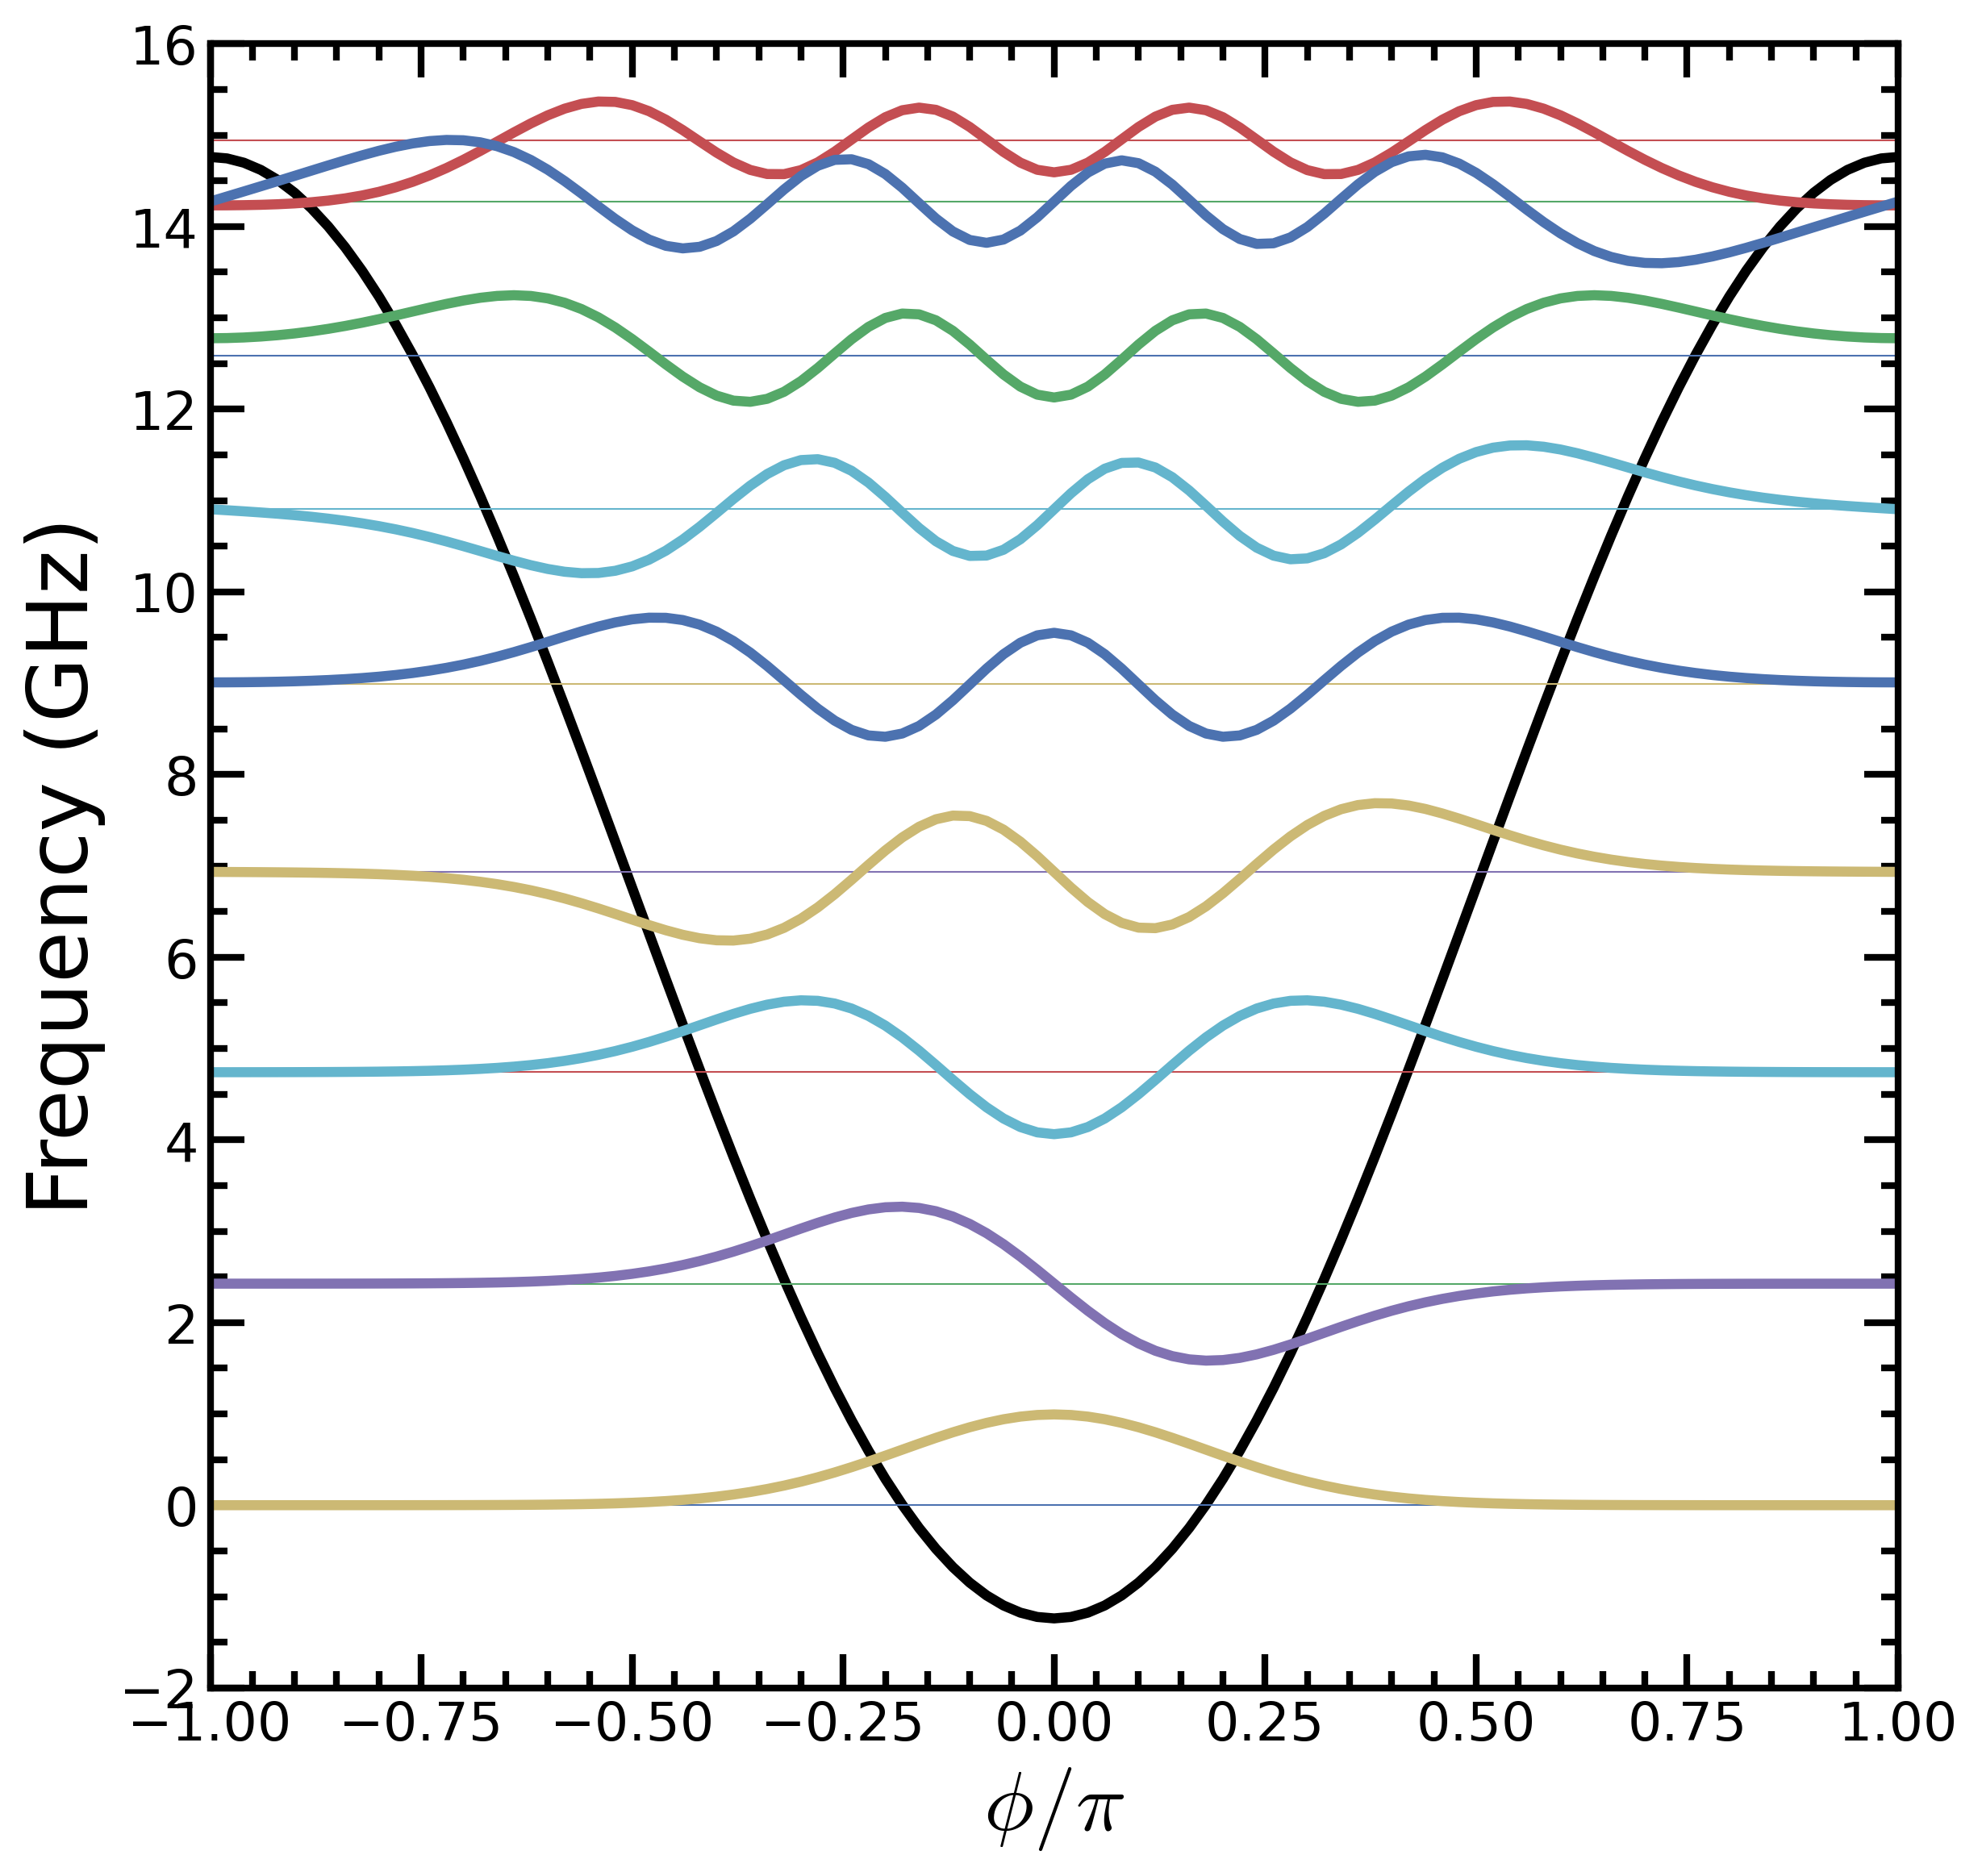

In [19]:
plt.figure(figsize = [9,9])
plt.plot (phi/np.pi, -Ej*np.cos(phi) - energies[0], color = 'k')
for state_idx in range(to_plot):
    plt.plot(phi/np.pi, np.ones(len(phi))*(energies[state_idx] - energies[0]), linewidth = 0.5)
for state_idx in range(0,to_plot,2):
    plt.plot(phi/np.pi, np.real(wavefunction_phase[:,state_idx])+energies[state_idx] - energies[0])
for state_idx in range(1,to_plot,2):
    plt.plot(phi/np.pi, np.imag(wavefunction_phase[:,state_idx])+energies[state_idx] - energies[0])
    
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.ylim([-2,16])
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])

## Phase basis
Finally, we explore the CPB model described in the phase basis $|\phi'\rangle$ with $\phi |\phi'\rangle = \phi' |\phi'\rangle$. First, we recall that a translation operator $e^{ix\phi}$ acting on a state $|n\rangle$ with $[\phi, n] = i$ (for instance, from Sakurai) follows
$$e^{ix\phi}|n\rangle = |n+x\rangle,$$ 
$$e^{-ix\phi}|n\rangle = |n-x\rangle.$$
From this, we can readily write the tunneling term in the Hamiltonian as $$\frac{E_J}{2}\sum_{n'} \left( |n'\rangle \langle n'+1| + |n'+1\rangle \langle n'| \right) = E_J\cos\phi.$$

Then, we can write the charge operator in the phase basis as $n=-i\partial / \partial \phi$, since charge and phase obey the commutation relation $[\phi,n] = i$. We can then write the Hamiltonian in the phase basis as 
$$H = 4E_C\left(\frac{\partial}{i\partial \phi} -n_g\right)^2 - E_J\cos\phi.$$

We again note that the charge is discrete and the phase in compact. This can also be inferred from the transformation between charge and phase basis. 
$$|n'\rangle = \frac{1}{\sqrt{2\pi}}\int_0^{2\pi} d\phi' e^{-in'\phi'}|\phi'\rangle ,$$
$$|\phi'\rangle = \frac{1}{\sqrt{2\pi}}\sum_n e^{in'\phi'}|n'\rangle .$$
On the other hand, the continuity of charge would break the periodicity in phase. The Hamiltonian above is also obviously periodic with respect to phase since the potential only contains a cosine term. The charge qubit can then be modeled very well as a quantum pendulum. A more rigorous way to preserve the periodicity of the phase in our computation is to define the basis as $|e^{i\phi}\rangle$ instead.

In order to simulate the spectrum and wavefunction in phase basis, we discretize the phase $\phi$, keeping in mind that it is physically continuous. We can then define the charge and phase operators in matrix form. To define the charge operator in matrix form, we notice that 
$$ \frac{\partial}{\partial \phi}\psi (\phi) = \frac{\psi(\phi+d\phi) - \psi(\phi-d\phi)}{2d\phi}.$$
So, if we write the phase operator as $\phi=\sum_{x} x|x\rangle \langle x|$, then the charge operator is $n = \frac{1}{2id\phi}\sum_x \left(|x\rangle \langle x+1| - |x+1\rangle \langle x| \right)$

In [12]:
#Solve in phase basis
Nphi = 601
Ej = 8
Ec = 0.1
ng = 0
phi = np.linspace(-np.pi,np.pi,2*Nphi+1)
phi_op = np.diag(phi)
cosphi = np.diag(np.cos(phi))
cosphi_op = Qobj(cosphi)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
print (commutator(Qobj(phi_op), Qobj(n_op)))
def hamiltonian_phase(Ec, Ej, ng):
#     m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*Qobj(phi_op).cosm()
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*cosphi_op
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej, ng).eigenstates()

Quantum object: dims = [[1203], [1203]], shape = (1203, 1203), type = oper, isherm = False
Qobj data =
[[0.+0.j  0.+0.5j 0.+0.j  ... 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.5j 0.+0.j  0.+0.5j ... 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.5j 0.+0.j  ... 0.+0.j  0.+0.j  0.+0.j ]
 ...
 [0.+0.j  0.+0.j  0.+0.j  ... 0.+0.j  0.+0.5j 0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  ... 0.+0.5j 0.+0.j  0.+0.5j]
 [0.+0.j  0.+0.j  0.+0.j  ... 0.+0.j  0.+0.5j 0.+0.j ]]


(-1.0, 1.0)

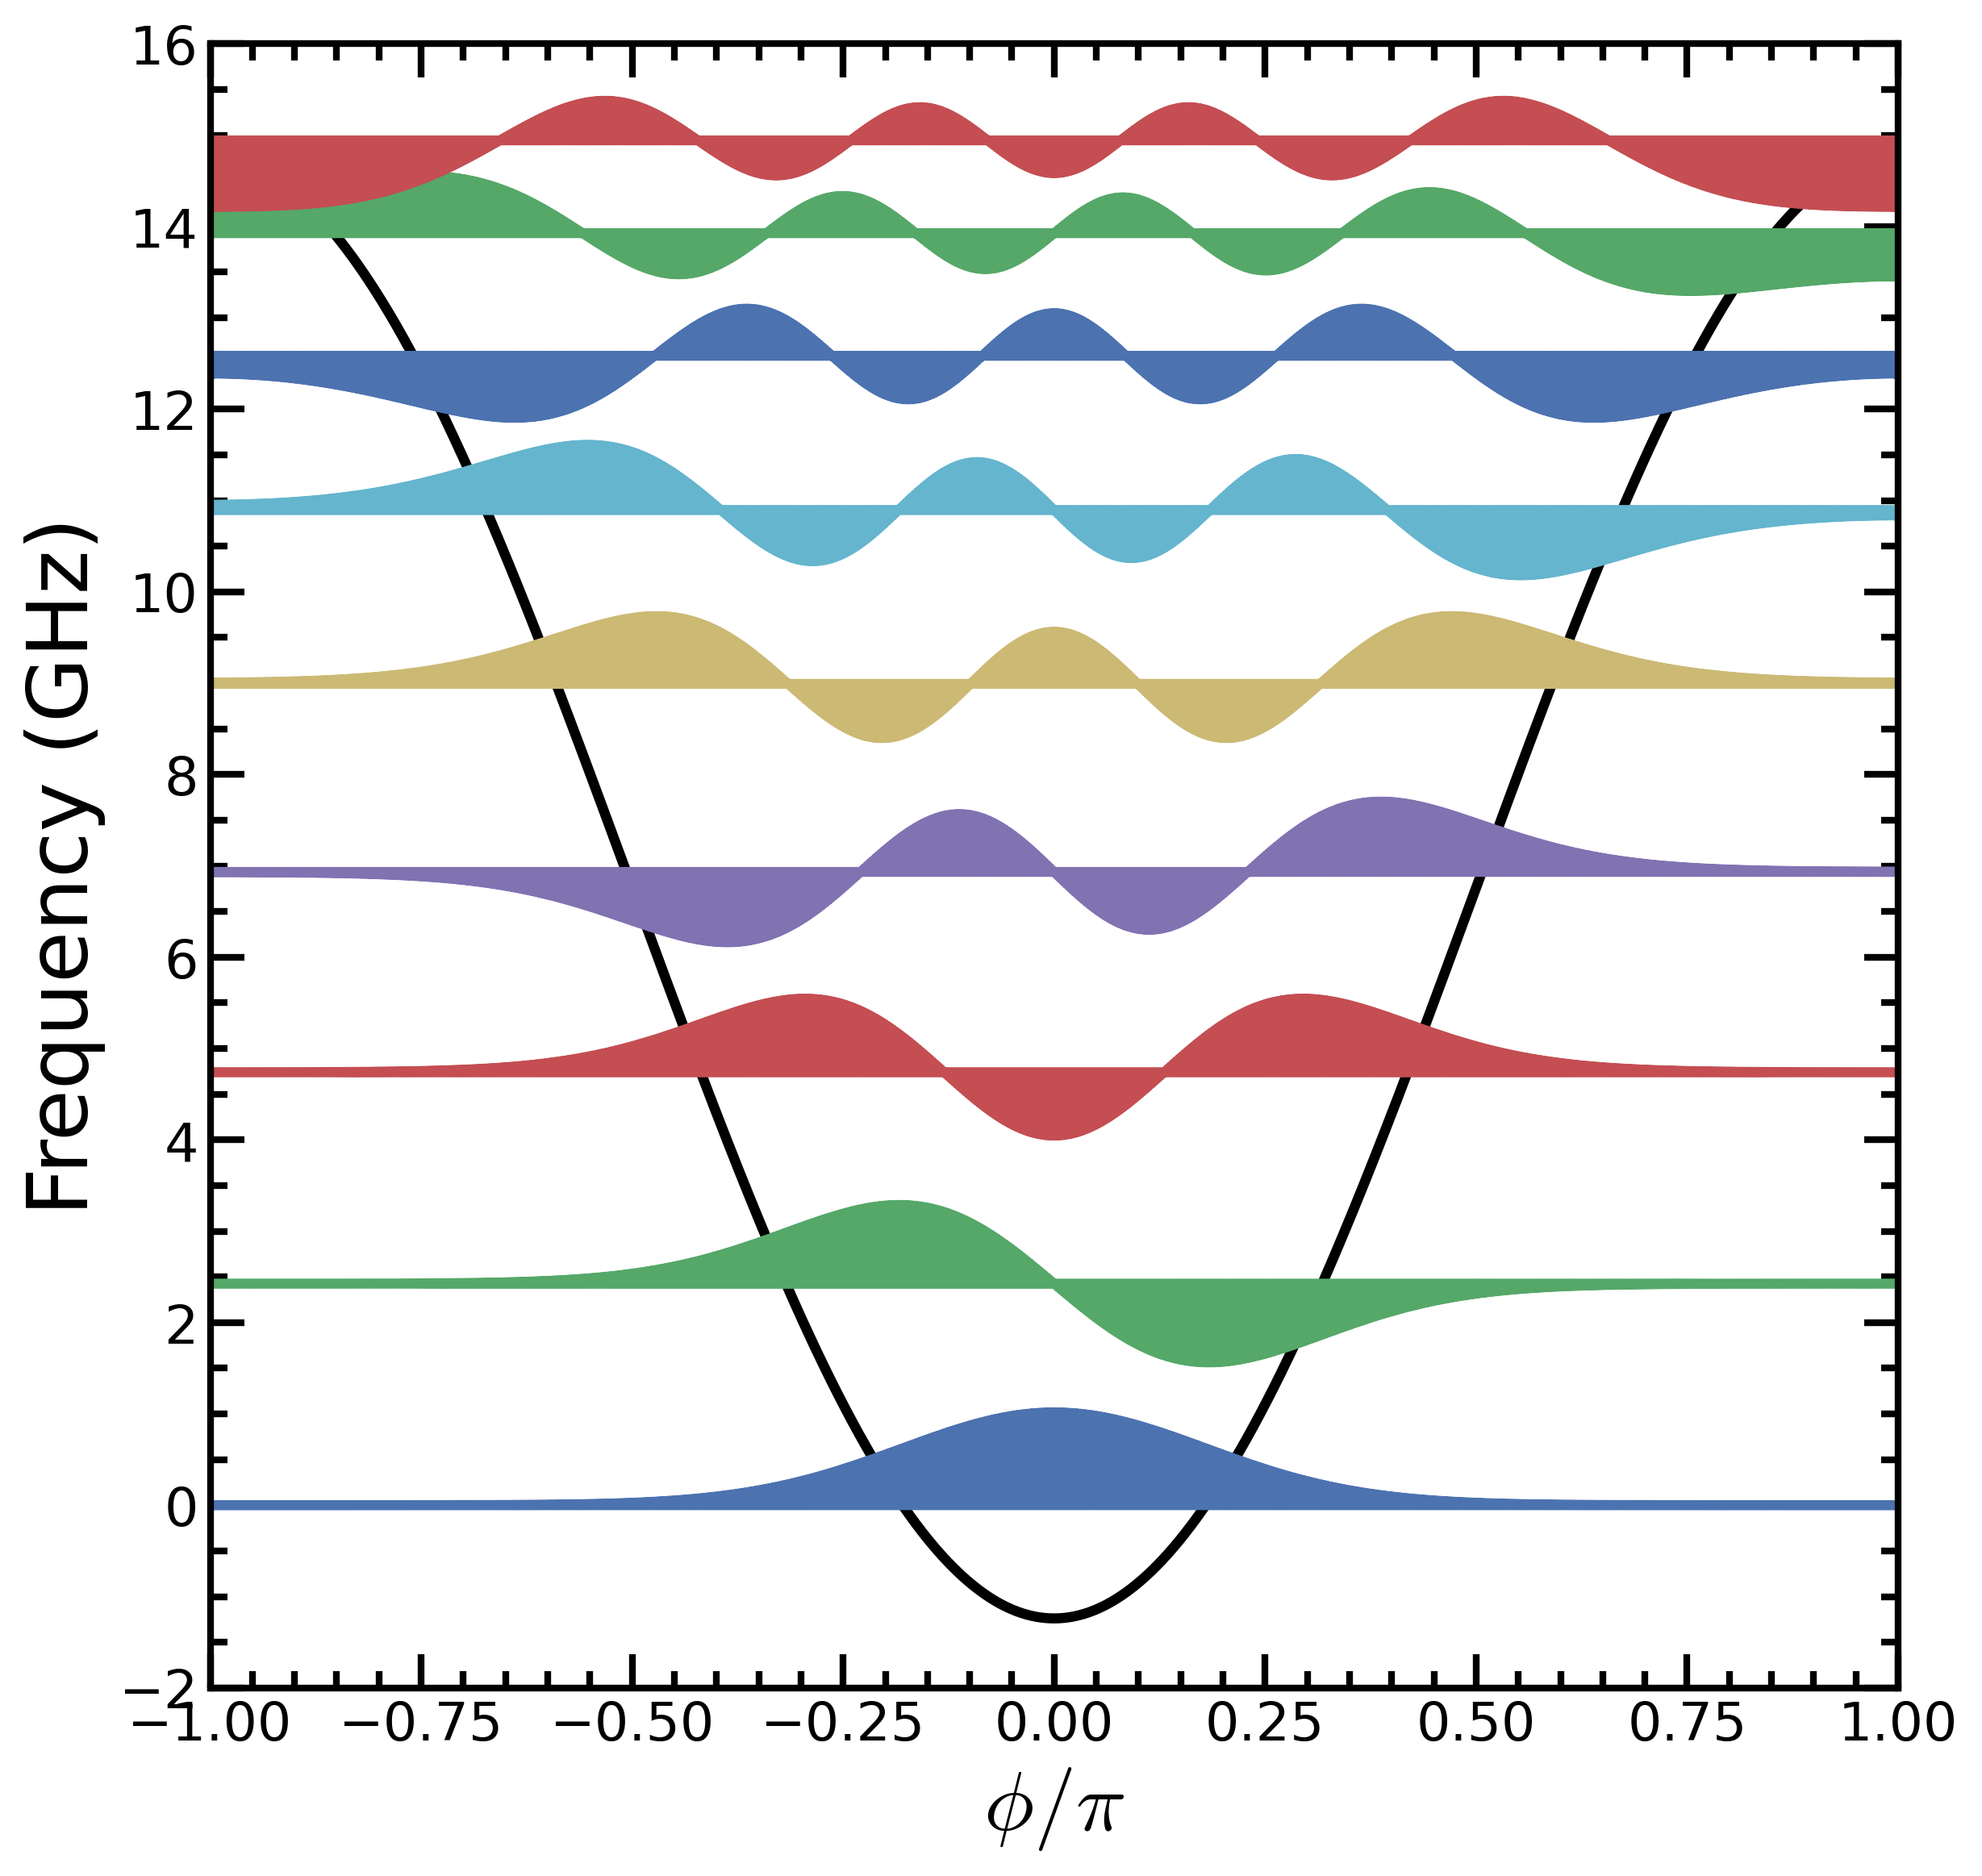

In [11]:
plt.figure(figsize =[9,9])
plt.plot(phi/np.pi, -Ej*np.cos(phi)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0]) 
plt.ylim([-2,16])
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.ylim([-2,16])
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])